<a href="https://colab.research.google.com/github/adinugrahadharmaputra/Tugas-Akhir/blob/main/Tugas_Akhir_1301200366.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import probplot
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam, SGD,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras.metrics import MeanSquaredError,R2Score,MeanAbsolutePercentageError
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import time

In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00


## Loading data

In [ ]:
!wget -O Data.xlsx https://raw.githubusercontent.com/adinugrahadharmaputra/Tugas-Akhir/main/Data.xlsx

--2024-01-06 09:32:02--  https://raw.githubusercontent.com/adinugrahadharmaputra/Tugas-Akhir/main/Data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101641 (99K) [application/octet-stream]
Saving to: ‘Data.xlsx’

Data.xlsx           100%[===================>]  99.26K  --.-KB/s    in 0.01s   

2024-01-06 09:32:02 (6.57 MB/s) - ‘Data.xlsx’ saved [101641/101641]



In [ ]:
df_2019 = pd.read_excel("Data.xlsx",sheet_name="2019")
df_2019.set_index('NO', inplace=True)
df_2019['year'] = 2019

# Cheking if data have a right value
cols_to_check = [col for col in df_2019.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2019[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2019[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2019

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Aceh Timur,31161,5458,3811,29.7,2019
2,ACEH,Aceh Tengah,17373,1147,462,9.3,2019
3,ACEH,Pidie,1598,135,7,8.9,2019
4,SUMATERA UTARA,Simalungun,53176,1097,119,2.3,2019
5,SUMATERA UTARA,Langkat,52066,2863,6679,18.3,2019
...,...,...,...,...,...,...,...
111,MALUKU,Maluku Tengah,3535,1401,458,5.3,2019
112,MALUKU,Kepulauan Aru,12506,1376,433,14.5,2019
113,MALUKU,Seram Bagian Barat,2144,572,322,4.2,2019


In [ ]:
df_2019

,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Aceh Timur,31161,5458,3811,29.7,2019
2,ACEH,Aceh Tengah,17373,1147,462,9.3,2019
3,ACEH,Pidie,1598,135,7,8.9,2019
4,SUMATERA UTARA,Simalungun,53176,1097,119,2.3,2019
5,SUMATERA UTARA,Langkat,52066,2863,6679,18.3,2019
...,...,...,...,...,...,...,...
111,MALUKU,Maluku Tengah,3535,1401,458,5.3,2019
112,MALUKU,Kepulauan Aru,12506,1376,433,14.5,2019
113,MALUKU,Seram Bagian Barat,2144,572,322,4.2,2019


In [ ]:
df_2020 = pd.read_excel("Data.xlsx",sheet_name="2020")
df_2020.set_index('NO', inplace=True)
df_2020['year'] = 2020

# Cheking if data have a right value
cols_to_check = [col for col in df_2020.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2020[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2020[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2020

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Simeulue,7109,968,452,20.0,2020
2,ACEH,Aceh Tenggara,15947,900,811,10.7,2020
3,ACEH,Aceh Timur,31161,5458,3811,29.7,2020
4,ACEH,Aceh Tengah,17373,1147,462,9.3,2020
5,ACEH,Pidie,1598,135,7,8.9,2020
...,...,...,...,...,...,...,...
240,PAPUA TENGAH,NABIRE,672,737,377,16.6,2020
241,PAPUA BARAT DAYA,SORONG SELATAN,4057,460,388,20.9,2020
242,PAPUA BARAT DAYA,RAJA AMPAT,4275,407,223,14.7,2020


In [ ]:
df_2021 = pd.read_excel("Data.xlsx",sheet_name="2021")
df_2021.set_index('NO', inplace=True)
df_2021['year'] = 2021

# Cheking if data have a right value
cols_to_check = [col for col in df_2021.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2021[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2021[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2021

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Simeulue,7723,1071,389,18.9,2021
2,ACEH,Aceh Tenggara,15843,1982,1006,18.9,2021
3,ACEH,Aceh Timur,26435,4287,1695,22.6,2021
4,ACEH,Aceh Tengah,18153,1151,450,8.8,2021
5,ACEH,Aceh Besar,30057,2784,1436,14.0,2021
...,...,...,...,...,...,...,...
355,PAPUA BARAT DAYA,SORONG,4791,545,295,17.5,2021
356,PAPUA BARAT DAYA,RAJA AMPAT,4609,272,151,9.2,2021
357,PAPUA BARAT DAYA,TAMBRAUW,498,78,46,24.9,2021


In [ ]:
df_2022 = pd.read_excel("Data.xlsx",sheet_name="2022")
df_2022.set_index('NO', inplace=True)
df_2022['year'] = 2022

# Cheking if data have a right value
cols_to_check = [col for col in df_2022.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2022[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2022[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2022

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Simeulue,8263,1265,360,19.7,2022
2,ACEH,Aceh Singkil,11066,873,239,10.0,2022
3,ACEH,Aceh Selatan,14626,1326,386,11.7,2022
4,ACEH,Aceh Tenggara,18844,1693,639,12.4,2022
5,ACEH,Aceh Timur,41306,2069,795,6.9,2022
...,...,...,...,...,...,...,...
504,PAPUA BARAT DAYA,SORONG,10301,446,257,6.8,2022
505,PAPUA BARAT DAYA,RAJA AMPAT,4872,343,165,10.4,2022
506,PAPUA BARAT DAYA,TAMBRAUW,2487,198,104,12.1,2022


In [ ]:
df_2023 = pd.read_excel("Data.xlsx",sheet_name="2023")
df_2023.set_index('NO', inplace=True)
df_2023['year'] = 2023

# Cheking if data have a right value
cols_to_check = [col for col in df_2023.columns if col not in ['NO', 'PROVINSI', 'Kota', 'year']]

# Convert selected columns to numeric
df_2019[cols_to_check] = df_2023[cols_to_check].apply(pd.to_numeric, errors='coerce')

# Check for non-numeric values
non_numeric_cols = df_2023[cols_to_check].applymap(lambda x: not pd.api.types.is_numeric_dtype(type(x)))
non_numeric_cols_sum = non_numeric_cols.sum()

if non_numeric_cols_sum.sum() == 0:
    print("All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.")
else:
    print("Columns with non-numeric values:")
    print(non_numeric_cols_sum[non_numeric_cols_sum > 0])

df_2023

All specified columns (except 'NO', 'PROVINSI', 'Kota', and 'year') contain numeric values.


,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
NO,,,,,,,
1,ACEH,Simeulue,7148,891,236,15.8,2023
2,ACEH,Aceh Singkil,12254,812,232,8.5,2023
3,ACEH,Aceh Selatan,18656,343,137,2.6,2023
4,ACEH,Aceh Tenggara,18754,1175,332,8.0,2023
5,ACEH,Aceh Timur,32439,2648,884,10.9,2023
...,...,...,...,...,...,...,...
506,PAPUA BARAT DAYA,SORONG,9009,254,100,3.9,2023
507,PAPUA BARAT DAYA,RAJA AMPAT,2239,422,163,26.1,2023
508,PAPUA BARAT DAYA,TAMBRAUW,793,165,97,33.0,2023


In [ ]:
data_test = df_2023

In [ ]:
combined_df = pd.concat([df_2019,df_2020, df_2021, df_2022, df_2023], ignore_index=True)

In [ ]:
combined_df

,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
0,ACEH,Aceh Timur,7148,891,236,15.8,2019
1,ACEH,Aceh Tengah,12254,812,232,8.5,2019
2,ACEH,Pidie,18656,343,137,2.6,2019
3,SUMATERA UTARA,Simalungun,18754,1175,332,8.0,2019
4,SUMATERA UTARA,Langkat,32439,2648,884,10.9,2019
...,...,...,...,...,...,...,...
1731,PAPUA BARAT DAYA,SORONG,9009,254,100,3.9,2023
1732,PAPUA BARAT DAYA,RAJA AMPAT,2239,422,163,26.1,2023
1733,PAPUA BARAT DAYA,TAMBRAUW,793,165,97,33.0,2023
1734,PAPUA BARAT DAYA,MAYBRAT,1748,129,72,11.5,2023


In [ ]:
# Filter and display cities with year 2019
cities_2019 = combined_df[combined_df['year'] == 2019]
cities_2019

,PROVINSI,Kota,Jumlah balita,Pendek,Sangat Pendek,Prevalensi,year
0,ACEH,Aceh Timur,7148,891,236,15.8,2019
1,ACEH,Aceh Tengah,12254,812,232,8.5,2019
2,ACEH,Pidie,18656,343,137,2.6,2019
3,SUMATERA UTARA,Simalungun,18754,1175,332,8.0,2019
4,SUMATERA UTARA,Langkat,32439,2648,884,10.9,2019
...,...,...,...,...,...,...,...
110,MALUKU,Maluku Tengah,1935,302,100,2.1,2019
111,MALUKU,Kepulauan Aru,117215,366,151,0.4,2019
112,MALUKU,Seram Bagian Barat,16091,66,25,0.6,2019
113,MALUKU UTARA,Kepulauan Sula,9795,70,35,1.1,2019


In [ ]:
# Filter city names with year 2019 and display only the 'Kota' column
cities_2019 = combined_df.loc[combined_df['year'] == 2019, 'Kota']
cities_2019

0              Aceh Timur
1             Aceh Tengah
2                   Pidie
3              Simalungun
4                 Langkat
              ...        
110         Maluku Tengah
111         Kepulauan Aru
112    Seram Bagian Barat
113        Kepulauan Sula
114     Halmahera Selatan
Name: Kota, Length: 115, dtype: object

In [ ]:
# Pivot the DataFrame to restructure it based on the 'year' column
pivot_data = combined_df.pivot_table(index=['PROVINSI', 'Kota'], columns='year', values=['Jumlah balita', 'Pendek', 'Sangat Pendek', 'Prevalensi'])

# Flatten the column names and reset the index
pivot_data.columns = [f'{col[0]} {col[1]}' for col in pivot_data.columns]
pivot_data = pivot_data.reset_index()

print(pivot_data)

           PROVINSI              Kota  Jumlah balita 2019  Jumlah balita 2020  \
0              ACEH        Aceh Barat                 NaN                 NaN   
1              ACEH   Aceh Barat Daya                 NaN                 NaN   
2              ACEH        Aceh Besar                 NaN                 NaN   
3              ACEH         Aceh Jaya                 NaN                 NaN   
4              ACEH      Aceh Selatan                 NaN                 NaN   
..              ...               ...                 ...                 ...   
530  SUMATERA UTARA        Simalungun             18754.0             53176.0   
531  SUMATERA UTARA  Tapanuli Selatan                 NaN                 NaN   
532  SUMATERA UTARA   Tapanuli Tengah                 NaN             14069.0   
533  SUMATERA UTARA    Tapanuli Utara                 NaN                 NaN   
534  SUMATERA UTARA      Toba Samosir                 NaN                 NaN   

     Jumlah balita 2021  Ju

In [ ]:
pivot_data

,PROVINSI,Kota,Jumlah balita 2019,Jumlah balita 2020,Jumlah balita 2021,Jumlah balita 2022,Jumlah balita 2023,Pendek 2019,Pendek 2020,Pendek 2021,...,Prevalensi 2019,Prevalensi 2020,Prevalensi 2021,Prevalensi 2022,Prevalensi 2023,Sangat Pendek 2019,Sangat Pendek 2020,Sangat Pendek 2021,Sangat Pendek 2022,Sangat Pendek 2023
0,ACEH,Aceh Barat,NaN,NaN,NaN,14787.0,12434.0,NaN,NaN,NaN,...,NaN,NaN,NaN,5.4,3.6,NaN,NaN,NaN,177.0,103.0
1,ACEH,Aceh Barat Daya,NaN,NaN,NaN,12546.0,8014.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10.6,11.9,NaN,NaN,NaN,276.0,221.0
2,ACEH,Aceh Besar,NaN,NaN,30057.0,35553.0,3389.0,NaN,NaN,2784.0,...,NaN,NaN,14.0,11.8,14.2,NaN,NaN,1436.0,996.0,1071.0
3,ACEH,Aceh Jaya,NaN,NaN,NaN,5471.0,7062.0,NaN,NaN,NaN,...,NaN,NaN,NaN,21.4,10.6,NaN,NaN,NaN,249.0,172.0
4,ACEH,Aceh Selatan,NaN,NaN,NaN,14626.0,18656.0,NaN,NaN,NaN,...,NaN,NaN,NaN,11.7,2.6,NaN,NaN,NaN,386.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,SUMATERA UTARA,Simalungun,18754.0,53176.0,51243.0,43137.0,37929.0,1175.0,1097.0,666.0,...,8.0,2.3,1.6,2.1,1.3,332.0,119.0,168.0,171.0,92.0
531,SUMATERA UTARA,Tapanuli Selatan,NaN,NaN,NaN,22826.0,2356.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.9,1.8,NaN,NaN,NaN,38.0,83.0
532,SUMATERA UTARA,Tapanuli Tengah,NaN,14069.0,24357.0,22431.0,20579.0,NaN,1239.0,1358.0,...,NaN,12.0,7.1,6.8,2.4,NaN,443.0,368.0,398.0,75.0
533,SUMATERA UTARA,Tapanuli Utara,NaN,NaN,20003.0,20032.0,18842.0,NaN,NaN,1323.0,...,NaN,NaN,8.2,6.3,9.6,NaN,NaN,318.0,240.0,447.0


In [ ]:
pivot_data.head()

,PROVINSI,Kota,Jumlah balita 2019,Jumlah balita 2020,Jumlah balita 2021,Jumlah balita 2022,Jumlah balita 2023,Pendek 2019,Pendek 2020,Pendek 2021,...,Prevalensi 2019,Prevalensi 2020,Prevalensi 2021,Prevalensi 2022,Prevalensi 2023,Sangat Pendek 2019,Sangat Pendek 2020,Sangat Pendek 2021,Sangat Pendek 2022,Sangat Pendek 2023
0,ACEH,Aceh Barat,NaN,NaN,NaN,14787.0,12434.0,NaN,NaN,NaN,...,NaN,NaN,NaN,5.4,3.6,NaN,NaN,NaN,177.0,103.0
1,ACEH,Aceh Barat Daya,NaN,NaN,NaN,12546.0,8014.0,NaN,NaN,NaN,...,NaN,NaN,NaN,10.6,11.9,NaN,NaN,NaN,276.0,221.0
2,ACEH,Aceh Besar,NaN,NaN,30057.0,35553.0,3389.0,NaN,NaN,2784.0,...,NaN,NaN,14.0,11.8,14.2,NaN,NaN,1436.0,996.0,1071.0
3,ACEH,Aceh Jaya,NaN,NaN,NaN,5471.0,7062.0,NaN,NaN,NaN,...,NaN,NaN,NaN,21.4,10.6,NaN,NaN,NaN,249.0,172.0
4,ACEH,Aceh Selatan,NaN,NaN,NaN,14626.0,18656.0,NaN,NaN,NaN,...,NaN,NaN,NaN,11.7,2.6,NaN,NaN,NaN,386.0,137.0


In [ ]:
# Assuming 'pivot_data' is your DataFrame containing the structured data
# Drop rows with NaN values
pivot_data.dropna(inplace=True)

# Reset the index if needed
pivot_data.reset_index(drop=True, inplace=True)


In [ ]:
data = pivot_data
data

,PROVINSI,Kota,Jumlah balita 2019,Jumlah balita 2020,Jumlah balita 2021,Jumlah balita 2022,Jumlah balita 2023,Pendek 2019,Pendek 2020,Pendek 2021,...,Prevalensi 2019,Prevalensi 2020,Prevalensi 2021,Prevalensi 2022,Prevalensi 2023,Sangat Pendek 2019,Sangat Pendek 2020,Sangat Pendek 2021,Sangat Pendek 2022,Sangat Pendek 2023
0,ACEH,Aceh Tengah,12254.0,17373.0,18153.0,18213.0,16907.0,812.0,1147.0,1151.0,...,8.5,9.3,8.8,8.7,7.8,232.0,462.0,450.0,385.0,339.0
1,ACEH,Aceh Timur,7148.0,31161.0,26435.0,41306.0,32439.0,891.0,5458.0,4287.0,...,15.8,29.7,22.6,6.9,10.9,236.0,3811.0,1695.0,795.0,884.0
2,ACEH,Pidie,18656.0,1598.0,36222.0,32703.0,34865.0,343.0,135.0,2059.0,...,2.6,8.9,7.1,4.8,4.5,137.0,7.0,515.0,451.0,276.0
3,BALI,Buleleng,33172.0,24191.0,28752.0,27997.0,28488.0,1663.0,2165.0,1255.0,...,6.1,12.3,5.9,3.6,3.7,346.0,818.0,439.0,183.0,305.0
4,BALI,Gianyar,32456.0,28277.0,25622.0,25601.0,25671.0,2207.0,1229.0,991.0,...,8.3,5.9,4.9,3.6,3.2,501.0,453.0,257.0,214.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,SUMATERA SELATAN,Muara Enim,11903.0,24291.0,37669.0,48624.0,44296.0,776.0,998.0,1942.0,...,8.3,6.0,7.5,3.2,2.2,214.0,461.0,883.0,451.0,240.0
97,SUMATERA SELATAN,Ogan Komering Ilir,22015.0,1444.0,14277.0,51609.0,53038.0,740.0,891.0,868.0,...,4.8,8.6,8.5,3.2,1.1,317.0,355.0,339.0,471.0,177.0
98,SUMATERA UTARA,Langkat,32439.0,52066.0,52203.0,52154.0,52203.0,2648.0,2863.0,2856.0,...,10.9,18.3,18.3,15.3,13.6,884.0,6679.0,6692.0,5539.0,2409.0
99,SUMATERA UTARA,Padang Lawas,16907.0,17362.0,19649.0,1983.0,1983.0,978.0,1316.0,861.0,...,7.8,11.4,5.8,5.5,5.5,339.0,660.0,283.0,264.0,264.0


# Preprocessing

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlations = data[numeric_columns].corr()['Prevalensi 2022'].abs().drop('Prevalensi 2022')
max_correlation_variable = correlations.idxmax()
X_selected = data[[max_correlation_variable]]
y_selected = data['Prevalensi 2022']
correlations

Jumlah balita 2019    0.070387
Jumlah balita 2020    0.217753
Jumlah balita 2021    0.243865
Jumlah balita 2022    0.271074
Jumlah balita 2023    0.289851
Pendek 2019           0.114748
Pendek 2020           0.021762
Pendek 2021           0.023655
Pendek 2022           0.182145
Pendek 2023           0.145056
Prevalensi 2019       0.201106
Prevalensi 2020       0.819661
Prevalensi 2021       0.843854
Prevalensi 2023       0.833664
Sangat Pendek 2019    0.106353
Sangat Pendek 2020    0.178878
Sangat Pendek 2021    0.112516
Sangat Pendek 2022    0.199373
Sangat Pendek 2023    0.080825
Name: Prevalensi 2022, dtype: float64

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlations = data[numeric_columns].corr()['Prevalensi 2023'].abs().drop('Prevalensi 2023')
max_correlation_variable = correlations.idxmax()
X_selected = data[[max_correlation_variable]]
y_selected = data['Prevalensi 2023']
correlations

Jumlah balita 2019    0.071585
Jumlah balita 2020    0.241441
Jumlah balita 2021    0.223893
Jumlah balita 2022    0.217321
Jumlah balita 2023    0.296436
Pendek 2019           0.160172
Pendek 2020           0.003771
Pendek 2021           0.044913
Pendek 2022           0.165008
Pendek 2023           0.190197
Prevalensi 2019       0.194459
Prevalensi 2020       0.769394
Prevalensi 2021       0.803291
Prevalensi 2022       0.833664
Sangat Pendek 2019    0.131025
Sangat Pendek 2020    0.161005
Sangat Pendek 2021    0.107237
Sangat Pendek 2022    0.190824
Sangat Pendek 2023    0.123610
Name: Prevalensi 2023, dtype: float64

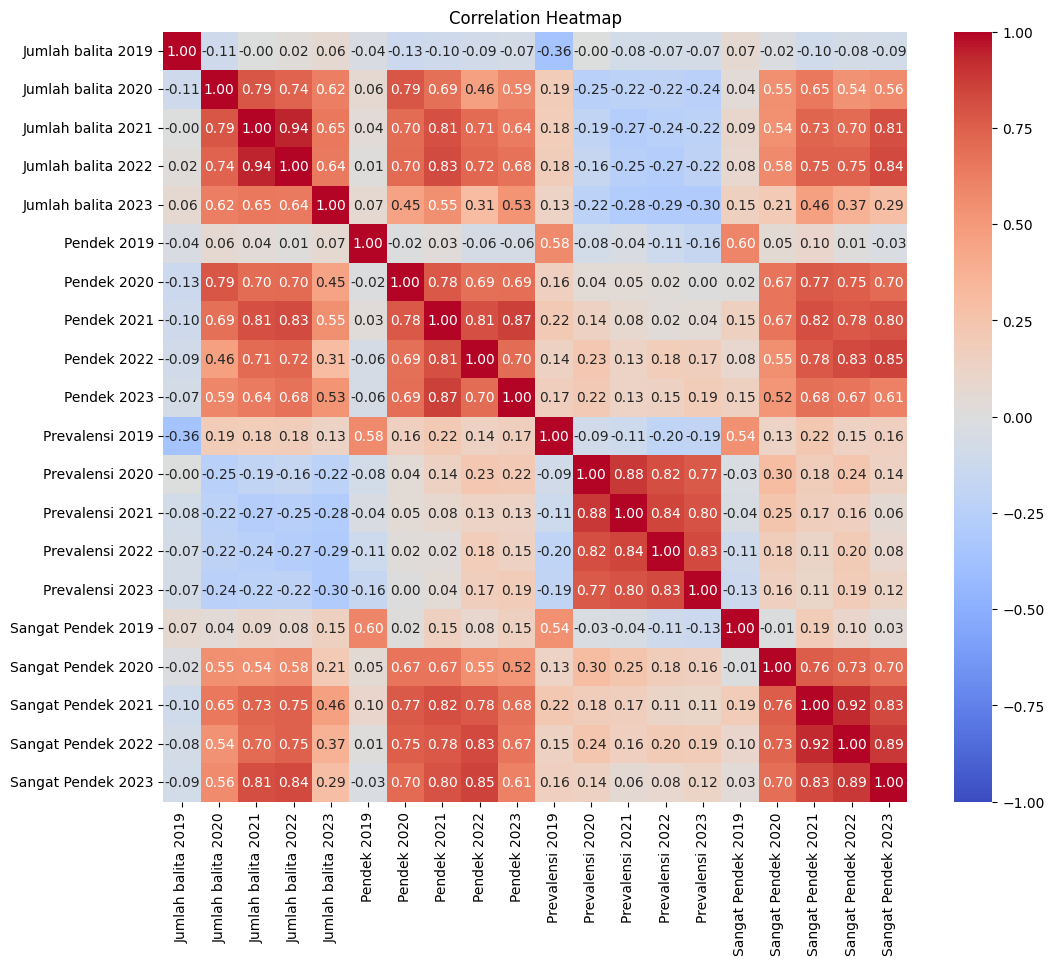

In [ ]:
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into features and target variable
X = data[['Jumlah balita 2019', 'Jumlah balita 2020','Jumlah balita 2021', 'Prevalensi 2019',  'Prevalensi 2020', 'Prevalensi 2021']]
y =data['Prevalensi 2022']
X_2023 = data[['Jumlah balita 2020', 'Jumlah balita 2021','Jumlah balita 2022', 'Prevalensi 2020',  'Prevalensi 2021', 'Prevalensi 2022']]
y_2023 = data['Prevalensi 2023']


X.columns = [f'{i}' for i in range(len(X.columns))]
# y.columns = [f'{i}' for i in range(len(y.columns))]
X_2023.columns = [f'{i}' for i in range(len(X_2023.columns))]
# y_2023.columns = [f'{i}' for i in range(len(y_2023.columns))]


In [ ]:
skewness_values = data[numeric_columns].apply(pd.Series.skew)
skewness_values

Jumlah balita 2019    2.397856
Jumlah balita 2020    2.320194
Jumlah balita 2021    3.694702
Jumlah balita 2022    3.994008
Jumlah balita 2023    1.836621
Pendek 2019           1.919653
Pendek 2020           3.252993
Pendek 2021           2.868973
Pendek 2022           3.481161
Pendek 2023           1.745021
Prevalensi 2019       0.837098
Prevalensi 2020       1.119743
Prevalensi 2021       1.049383
Prevalensi 2022       1.402882
Prevalensi 2023       0.931285
Sangat Pendek 2019    3.762939
Sangat Pendek 2020    3.253341
Sangat Pendek 2021    3.588315
Sangat Pendek 2022    4.290645
Sangat Pendek 2023    6.844663
dtype: float64

In [ ]:
average_skewness = skewness_values.mean()
average_skewness

2.7295737454493336

In [ ]:
def plot_prob_hist(data):
    if isinstance(data, np.ndarray):
        num_columns = data.shape[1]
        column_names = [f'Column {i + 1}' for i in range(num_columns)]
    else:
        num_columns = len(data.columns)
        column_names = data.columns

    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(10, 2 * num_columns))

    for i in range(num_columns):
        if isinstance(data, np.ndarray):
            column_data = data[:, i]
        else:
            column_data = data.iloc[:, i]

        probplot(column_data, plot=axes[i, 0])
        axes[i, 0].set_title(f'Probability Plot - {column_names[i]}')

        axes[i, 1].hist(column_data, bins=20, density=True, alpha=0.5)
        axes[i, 1].set_title(f'Histogram - {column_names[i]}')

    plt.tight_layout()
    plt.show()

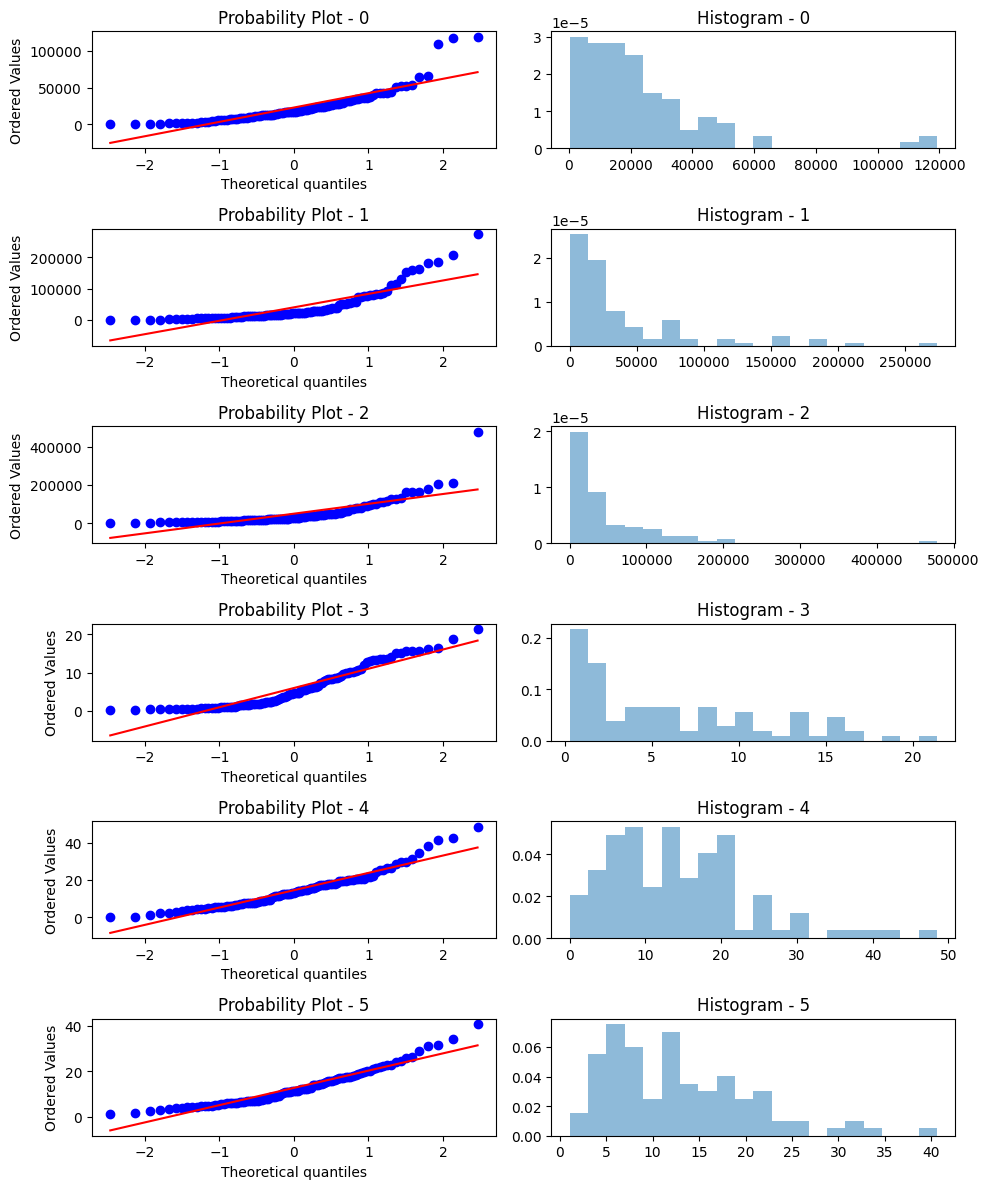

In [ ]:
plot_prob_hist(X)

In [ ]:
X.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

In [ ]:
y.dtypes

dtype('float64')

In [ ]:
X_2023.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
dtype: object

In [ ]:
y_2023.dtypes

dtype('float64')

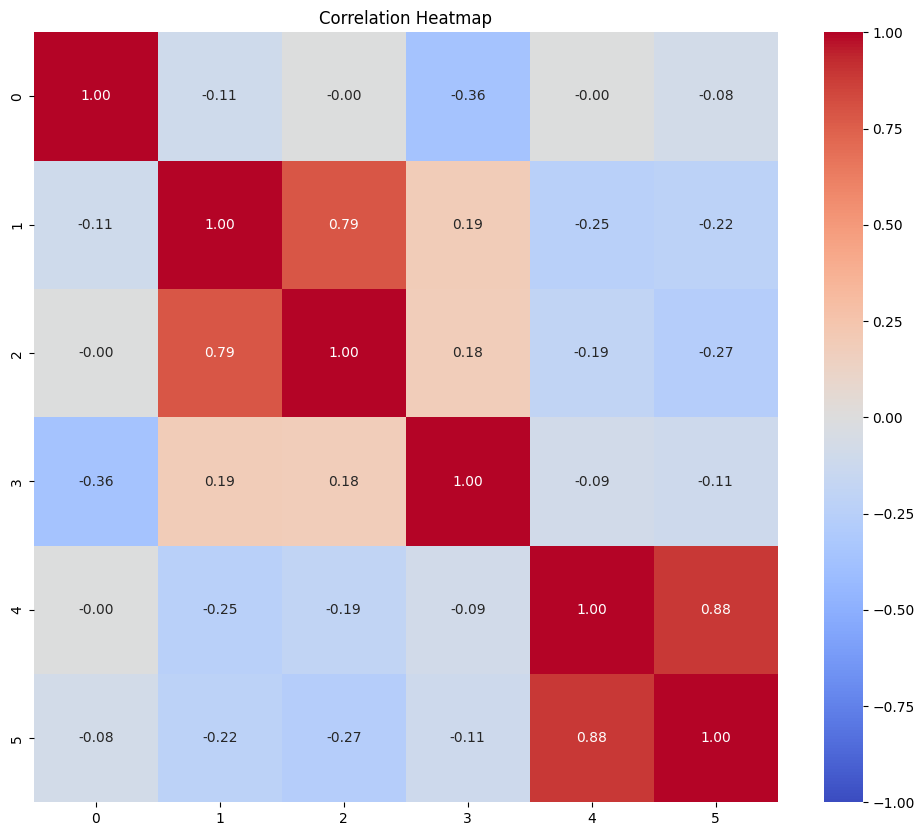

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
unscaled_X_train, unscaled_X_test=X_train, X_test

In [ ]:
unscaled_X_train

,0,1,2,3,4,5
89,44296.0,50195.0,50195.0,2.2,4.4,4.4
26,22679.0,0.0,97533.0,10.1,0.0,6.1
42,15471.0,80364.0,79356.0,0.4,16.1,16.1
70,12364.0,14184.0,14184.0,8.3,26.2,26.2
15,20579.0,962.0,211413.0,2.4,14.4,6.4
...,...,...,...,...,...,...
60,1161.0,53892.0,44316.0,13.6,3.9,6.0
71,52666.0,21927.0,21928.0,1.6,17.3,17.3
14,14035.0,182632.0,164124.0,7.2,7.7,11.8
92,53038.0,16232.0,16232.0,1.1,1.1,1.1


In [ ]:
unscaled_X_test

,0,1,2,3,4,5
84,39583.0,4656.0,46097.0,6.3,7.8,3.9
55,4546.0,4909.0,4909.0,0.7,14.1,14.1
66,28333.0,12869.0,15204.0,6.2,25.2,22.6
67,2457.0,17898.0,15131.0,4.6,17.7,21.2
45,7211.0,37226.0,36528.0,3.6,13.0,11.4
39,11524.0,151534.0,129077.0,2.4,12.1,11.4
22,52203.0,9289.0,97451.0,13.6,19.7,14.1
44,17555.0,81896.0,61507.0,13.3,3.9,3.9
10,8139.0,14565.0,15414.0,3.9,7.3,7.1
0,12254.0,17373.0,18153.0,8.5,9.3,8.8


In [ ]:
# Scale the data
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)
X_2023_scaled = scaler.transform(X_2023)

In [ ]:
X_train.shape

(80, 6)

In [ ]:
X_2023_scaled.shape

(101, 6)

In [ ]:
X_test.shape

(21, 6)

In [ ]:
X_test.shape[1]

6

# Model

In [ ]:
model_n_trial=50
model_patience = 100
lr_range = (0.00001,0.1)

In [ ]:
def compare_random_samples(y_actual, y_predicted, num_samples=10):
    indices = np.random.choice(len(y_actual), num_samples, replace=False)

    for idx in indices:
        actual_value = y_actual.iloc[idx]
        predicted_value = y_predicted[idx]
        print(f"Actual: {actual_value}, Predicted: {predicted_value}")


In [ ]:
def compare_samples_in_range(y_actual, y_predicted, start_index=0, end_index=10):
    # Ensure the end_index is within the range of the length of y_actual
    end_index = min(end_index, len(y_actual))

    data = {'Actual': [], 'Predicted': []}

    for idx in range(start_index, end_index):
        actual_value = y_actual.iloc[idx]
        predicted_value = y_predicted[idx]

        # Convert single-element arrays to numbers
        if isinstance(predicted_value, np.ndarray) and predicted_value.size == 1:
            predicted_value = predicted_value.item()

        data['Actual'].append(actual_value)
        data['Predicted'].append(predicted_value)
        print(f"Actual: {actual_value}, Predicted: {predicted_value}")

    result_df = pd.DataFrame(data)
    return result_df


## ANN MODEL

In [ ]:
model_epoch = 1000
model_metrics = (MeanSquaredError(),R2Score(),MeanAbsolutePercentageError())
model_loss ='mean_squared_error'
best_model_monitor = "loss"
e_stop_monitor = 'val_loss'

In [ ]:
def build_ann_model(neurons_layer, learning_rate, verbose=1, best_model_name = 'best_model.h5' ,loss_func = 'mean_squared_error', metrics = None):
    # Create a Sequential model
    if type(neurons_layer) == tuple:
        model = keras.Sequential([
            layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],), input_dim=2)
        ])
        for i in range(len(neurons_layer)):
            model.add(layers.Dense(neurons_layer[i], activation='relu'))
        model.add(layers.Dense(1,activation = 'relu'))
    else:
        model = keras.Sequential([
            layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],), input_dim=2),
            layers.Dense(neurons_layer, activation='relu'),
            layers.Dense(1, activation = 'relu')  # Output layer for regression
        ])

    # Define a checkpoint to save the best model
    checkpoint = ModelCheckpoint(best_model_name, monitor=best_model_monitor, save_best_only=True, mode='min', verbose=verbose)

    # Compile the model with specified learning rate
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss=loss_func, metrics = metrics )

    return model, checkpoint

### Hyperparameter Tuning

#### 1 Layer Model

In [ ]:
start_time = time.time()

In [ ]:
def ann_1_layer_objective(trial):
    print(f"Running Trial {trial.number}")
    model, checkpoint = build_ann_model(trial.suggest_int('num_neurons_layer1', 1, 10), trial.suggest_float('learning_rate', lr_range[0],lr_range[1],step = lr_range[0]),verbose=0, best_model_name='best_trial_model.h5')


    e_stop = EarlyStopping(monitor=e_stop_monitor, patience=model_patience, mode='min', verbose=0)

    # model.fit(X_train, y_train, epochs=trial.suggest_int('epoch', 50, 1000,50), batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]),
    #                     validation_split=0.2, callbacks=[checkpoint, e_stop], verbose=0)

    model.fit(X_train, y_train, epochs=model_epoch, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]),
                        validation_split=0.2, callbacks=[checkpoint, e_stop], verbose=0)

    best_model = load_model('best_trial_model.h5')

    # Evaluate the model on the validation set
    loss = model.evaluate(X_test, y_test)

    return loss

# Run the genetic algorithm using Optuna
ann_1_layer_study = optuna.create_study(direction='minimize', study_name='Best_Hyperparameter', storage='sqlite:///:memory:', load_if_exists=True)
ann_1_layer_study.optimize(ann_1_layer_objective, n_trials=model_n_trial, n_jobs=1)

[I 2024-01-06 09:32:11,849] A new study created in RDB with name: Best_Hyperparameter


Running Trial 0


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 57ms/step - loss: 228.6852


[I 2024-01-06 09:32:18,942] Trial 0 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 3, 'learning_rate': 0.03898000000000001, 'batch_size': 32}. Best is trial 0 with value: 228.6852264404297.


Running Trial 1
1/1 [==============================] - 0s 108ms/step - loss: 43.3769


[I 2024-01-06 09:33:05,163] Trial 1 finished with value: 43.37690353393555 and parameters: {'num_neurons_layer1': 4, 'learning_rate': 0.01337, 'batch_size': 16}. Best is trial 1 with value: 43.37690353393555.


Running Trial 2
1/1 [==============================] - 0s 94ms/step - loss: 228.6852


[I 2024-01-06 09:33:09,395] Trial 2 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 3, 'learning_rate': 0.04957000000000001, 'batch_size': 16}. Best is trial 1 with value: 43.37690353393555.


Running Trial 3
1/1 [==============================] - 0s 99ms/step - loss: 228.6814


[I 2024-01-06 09:33:13,614] Trial 3 finished with value: 228.68141174316406 and parameters: {'num_neurons_layer1': 8, 'learning_rate': 0.040780000000000004, 'batch_size': 16}. Best is trial 1 with value: 43.37690353393555.


Running Trial 4
1/1 [==============================] - 0s 24ms/step - loss: 228.6852


[I 2024-01-06 09:33:19,939] Trial 4 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 2, 'learning_rate': 0.07198, 'batch_size': 32}. Best is trial 1 with value: 43.37690353393555.


Running Trial 5
1/1 [==============================] - 0s 94ms/step - loss: 43.3602


[I 2024-01-06 09:33:33,396] Trial 5 finished with value: 43.36017608642578 and parameters: {'num_neurons_layer1': 2, 'learning_rate': 0.045340000000000005, 'batch_size': 8}. Best is trial 5 with value: 43.36017608642578.


Running Trial 6
1/1 [==============================] - 0s 94ms/step - loss: 228.6852


[I 2024-01-06 09:33:37,716] Trial 6 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 2, 'learning_rate': 0.06594, 'batch_size': 16}. Best is trial 5 with value: 43.36017608642578.


Running Trial 7
1/1 [==============================] - 0s 98ms/step - loss: 42.2762


[I 2024-01-06 09:33:59,185] Trial 7 finished with value: 42.27620315551758 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.015870000000000002, 'batch_size': 16}. Best is trial 7 with value: 42.27620315551758.


Running Trial 8
1/1 [==============================] - 0s 23ms/step - loss: 228.6852


[I 2024-01-06 09:34:03,176] Trial 8 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 5, 'learning_rate': 0.01755, 'batch_size': 32}. Best is trial 7 with value: 42.27620315551758.


Running Trial 9
1/1 [==============================] - 0s 23ms/step - loss: 228.6852


[I 2024-01-06 09:34:08,246] Trial 9 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 1, 'learning_rate': 0.00237, 'batch_size': 32}. Best is trial 7 with value: 42.27620315551758.


Running Trial 10
1/1 [==============================] - 0s 97ms/step - loss: 42.1457


[I 2024-01-06 09:34:22,915] Trial 10 finished with value: 42.14574432373047 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.09404, 'batch_size': 8}. Best is trial 10 with value: 42.14574432373047.


Running Trial 11
1/1 [==============================] - 0s 108ms/step - loss: 40.8131


[I 2024-01-06 09:34:35,535] Trial 11 finished with value: 40.81305694580078 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.09385, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 12
1/1 [==============================] - 0s 97ms/step - loss: 44.5682


[I 2024-01-06 09:34:48,724] Trial 12 finished with value: 44.56815719604492 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.09842000000000001, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 13
1/1 [==============================] - 0s 155ms/step - loss: 51.5176


[I 2024-01-06 09:34:58,641] Trial 13 finished with value: 51.51764678955078 and parameters: {'num_neurons_layer1': 8, 'learning_rate': 0.09937, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 14
1/1 [==============================] - 0s 139ms/step - loss: 44.7802


[I 2024-01-06 09:35:10,327] Trial 14 finished with value: 44.7801628112793 and parameters: {'num_neurons_layer1': 8, 'learning_rate': 0.08218, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 15
1/1 [==============================] - 0s 96ms/step - loss: 45.4852


[I 2024-01-06 09:35:18,455] Trial 15 finished with value: 45.48521041870117 and parameters: {'num_neurons_layer1': 7, 'learning_rate': 0.08158, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 16
1/1 [==============================] - 0s 109ms/step - loss: 47.9705


[I 2024-01-06 09:35:29,729] Trial 16 finished with value: 47.970489501953125 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.08669, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 17
1/1 [==============================] - 0s 93ms/step - loss: 43.2077


[I 2024-01-06 09:35:40,960] Trial 17 finished with value: 43.207706451416016 and parameters: {'num_neurons_layer1': 6, 'learning_rate': 0.06337, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 18
1/1 [==============================] - 0s 150ms/step - loss: 50.0222


[I 2024-01-06 09:35:49,322] Trial 18 finished with value: 50.022239685058594 and parameters: {'num_neurons_layer1': 9, 'learning_rate': 0.09111000000000001, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 19
1/1 [==============================] - 0s 97ms/step - loss: 228.6852


[I 2024-01-06 09:36:00,910] Trial 19 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 9, 'learning_rate': 0.05768000000000001, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 20
1/1 [==============================] - 0s 259ms/step - loss: 46.8768


[I 2024-01-06 09:36:12,712] Trial 20 finished with value: 46.8768196105957 and parameters: {'num_neurons_layer1': 7, 'learning_rate': 0.07655, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 21
1/1 [==============================] - 0s 105ms/step - loss: 228.6852


[I 2024-01-06 09:36:18,838] Trial 21 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.025730000000000003, 'batch_size': 16}. Best is trial 11 with value: 40.81305694580078.


Running Trial 22
1/1 [==============================] - 0s 110ms/step - loss: 228.6852


[I 2024-01-06 09:36:24,217] Trial 22 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 9, 'learning_rate': 0.029580000000000002, 'batch_size': 16}. Best is trial 11 with value: 40.81305694580078.


Running Trial 23
1/1 [==============================] - 0s 106ms/step - loss: 228.6852


[I 2024-01-06 09:36:30,443] Trial 23 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.0002, 'batch_size': 16}. Best is trial 11 with value: 40.81305694580078.


Running Trial 24
1/1 [==============================] - 0s 105ms/step - loss: 47.6530


[I 2024-01-06 09:36:39,459] Trial 24 finished with value: 47.65301513671875 and parameters: {'num_neurons_layer1': 9, 'learning_rate': 0.09149, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 25
1/1 [==============================] - 0s 98ms/step - loss: 43.1309


[I 2024-01-06 09:36:49,713] Trial 25 finished with value: 43.13092803955078 and parameters: {'num_neurons_layer1': 7, 'learning_rate': 0.056060000000000006, 'batch_size': 16}. Best is trial 11 with value: 40.81305694580078.


Running Trial 26
1/1 [==============================] - 0s 117ms/step - loss: 48.0068


[I 2024-01-06 09:37:01,008] Trial 26 finished with value: 48.00678253173828 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.07195, 'batch_size': 8}. Best is trial 11 with value: 40.81305694580078.


Running Trial 27
1/1 [==============================] - 0s 97ms/step - loss: 38.6545


[I 2024-01-06 09:37:12,374] Trial 27 finished with value: 38.65448760986328 and parameters: {'num_neurons_layer1': 8, 'learning_rate': 0.034670000000000006, 'batch_size': 8}. Best is trial 27 with value: 38.65448760986328.


Running Trial 28
1/1 [==============================] - 0s 151ms/step - loss: 43.3722


[I 2024-01-06 09:37:33,952] Trial 28 finished with value: 43.37223434448242 and parameters: {'num_neurons_layer1': 8, 'learning_rate': 0.03228, 'batch_size': 8}. Best is trial 27 with value: 38.65448760986328.


Running Trial 29
1/1 [==============================] - 0s 24ms/step - loss: 42.3244


[I 2024-01-06 09:37:50,386] Trial 29 finished with value: 42.32444763183594 and parameters: {'num_neurons_layer1': 6, 'learning_rate': 0.036910000000000005, 'batch_size': 32}. Best is trial 27 with value: 38.65448760986328.


Running Trial 30
1/1 [==============================] - 0s 139ms/step - loss: 46.3541


[I 2024-01-06 09:37:58,069] Trial 30 finished with value: 46.35411834716797 and parameters: {'num_neurons_layer1': 9, 'learning_rate': 0.09072000000000001, 'batch_size': 8}. Best is trial 27 with value: 38.65448760986328.


Running Trial 31
1/1 [==============================] - 0s 110ms/step - loss: 44.5035


[I 2024-01-06 09:38:19,895] Trial 31 finished with value: 44.50354766845703 and parameters: {'num_neurons_layer1': 10, 'learning_rate': 0.020810000000000002, 'batch_size': 8}. Best is trial 27 with value: 38.65448760986328.


Running Trial 32
1/1 [==============================] - 0s 102ms/step - loss: 45.6507


[I 2024-01-06 09:38:45,338] Trial 32 finished with value: 45.650726318359375 and parameters: {'num_neurons_layer1': 9, 'learning_rate': 0.01069, 'batch_size': 8}. Best is trial 27 with value: 38.65448760986328.


Running Trial 33
1/1 [==============================] - 0s 100ms/step - loss: 42.0573


[I 2024-01-06 09:39:06,843] Trial 33 finished with value: 42.05727005004883 and parameters: {'num_neurons_layer1': 8, 'learning_rate': 0.01184, 'batch_size': 16}. Best is trial 27 with value: 38.65448760986328.


Running Trial 34
1/1 [==============================] - 0s 98ms/step - loss: 40.5369


[I 2024-01-06 09:39:48,823] Trial 34 finished with value: 40.536865234375 and parameters: {'num_neurons_layer1': 5, 'learning_rate': 0.00741, 'batch_size': 16}. Best is trial 27 with value: 38.65448760986328.


Running Trial 35
1/1 [==============================] - 0s 128ms/step - loss: 39.2342


[I 2024-01-06 09:40:08,402] Trial 35 finished with value: 39.2342414855957 and parameters: {'num_neurons_layer1': 4, 'learning_rate': 0.00752, 'batch_size': 16}. Best is trial 27 with value: 38.65448760986328.


Running Trial 36
1/1 [==============================] - 0s 102ms/step - loss: 228.6852


[I 2024-01-06 09:40:12,768] Trial 36 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 4, 'learning_rate': 0.0069900000000000006, 'batch_size': 16}. Best is trial 27 with value: 38.65448760986328.


Running Trial 37
1/1 [==============================] - 0s 99ms/step - loss: 43.5837


[I 2024-01-06 09:40:34,264] Trial 37 finished with value: 43.58366012573242 and parameters: {'num_neurons_layer1': 4, 'learning_rate': 0.022430000000000002, 'batch_size': 16}. Best is trial 27 with value: 38.65448760986328.


Running Trial 38
1/1 [==============================] - 0s 100ms/step - loss: 41.2987


[I 2024-01-06 09:40:45,570] Trial 38 finished with value: 41.298736572265625 and parameters: {'num_neurons_layer1': 5, 'learning_rate': 0.04896000000000001, 'batch_size': 16}. Best is trial 27 with value: 38.65448760986328.


Running Trial 39
1/1 [==============================] - 0s 98ms/step - loss: 46.3461


[I 2024-01-06 09:41:07,117] Trial 39 finished with value: 46.34605407714844 and parameters: {'num_neurons_layer1': 3, 'learning_rate': 0.041620000000000004, 'batch_size': 16}. Best is trial 27 with value: 38.65448760986328.


Running Trial 40
1/1 [==============================] - 0s 33ms/step - loss: 38.3285


[I 2024-01-06 09:41:34,948] Trial 40 finished with value: 38.32848358154297 and parameters: {'num_neurons_layer1': 5, 'learning_rate': 0.00601, 'batch_size': 32}. Best is trial 40 with value: 38.32848358154297.


Running Trial 41
1/1 [==============================] - 0s 23ms/step - loss: 38.3144


[I 2024-01-06 09:42:19,378] Trial 41 finished with value: 38.31443405151367 and parameters: {'num_neurons_layer1': 5, 'learning_rate': 0.00632, 'batch_size': 32}. Best is trial 41 with value: 38.31443405151367.


Running Trial 42
1/1 [==============================] - 0s 34ms/step - loss: 36.9461


[I 2024-01-06 09:42:48,306] Trial 42 finished with value: 36.94608688354492 and parameters: {'num_neurons_layer1': 5, 'learning_rate': 0.0066300000000000005, 'batch_size': 32}. Best is trial 42 with value: 36.94608688354492.


Running Trial 43
1/1 [==============================] - 0s 37ms/step - loss: 228.6852


[I 2024-01-06 09:42:54,535] Trial 43 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 3, 'learning_rate': 0.00548, 'batch_size': 32}. Best is trial 42 with value: 36.94608688354492.


Running Trial 44
1/1 [==============================] - 0s 26ms/step - loss: 41.7355


[I 2024-01-06 09:43:36,750] Trial 44 finished with value: 41.73549270629883 and parameters: {'num_neurons_layer1': 4, 'learning_rate': 0.01796, 'batch_size': 32}. Best is trial 42 with value: 36.94608688354492.


Running Trial 45
1/1 [==============================] - 0s 24ms/step - loss: 36.8181


[I 2024-01-06 09:44:18,670] Trial 45 finished with value: 36.81808090209961 and parameters: {'num_neurons_layer1': 6, 'learning_rate': 0.011930000000000001, 'batch_size': 32}. Best is trial 45 with value: 36.81808090209961.


Running Trial 46
1/1 [==============================] - 0s 27ms/step - loss: 228.6852


[I 2024-01-06 09:44:24,750] Trial 46 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 6, 'learning_rate': 0.0137, 'batch_size': 32}. Best is trial 45 with value: 36.81808090209961.


Running Trial 47
1/1 [==============================] - 0s 25ms/step - loss: 44.7316


[I 2024-01-06 09:45:16,759] Trial 47 finished with value: 44.731563568115234 and parameters: {'num_neurons_layer1': 5, 'learning_rate': 0.00041000000000000005, 'batch_size': 32}. Best is trial 45 with value: 36.81808090209961.


Running Trial 48
1/1 [==============================] - 0s 25ms/step - loss: 228.6852


[I 2024-01-06 09:45:20,968] Trial 48 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 6, 'learning_rate': 0.01674, 'batch_size': 32}. Best is trial 45 with value: 36.81808090209961.


Running Trial 49
1/1 [==============================] - 0s 25ms/step - loss: 40.8889


[I 2024-01-06 09:45:38,026] Trial 49 finished with value: 40.88893508911133 and parameters: {'num_neurons_layer1': 5, 'learning_rate': 0.02526, 'batch_size': 32}. Best is trial 45 with value: 36.81808090209961.


In [ ]:
end_time = time.time()
ann_1_layer_hyperparameter_tuning = end_time - start_time

In [ ]:
ann_1_layer_best_params = ann_1_layer_study.best_params
print("Best Hyperparameters:", ann_1_layer_best_params)

Best Hyperparameters: {'num_neurons_layer1': 6, 'learning_rate': 0.011930000000000001, 'batch_size': 32}


#### 2 Layer Model

In [ ]:
start_time = time.time()

In [ ]:
def ann_2_layer_objective(trial):
    print(f"Running Trial {trial.number}")

    model, checkpoint = build_ann_model((trial.suggest_int('num_neurons_layer1', 1, 10), trial.suggest_int('num_neurons_layer2', 1, 10)), trial.suggest_float('learning_rate', lr_range[0],lr_range[1],step = lr_range[0]),verbose=0, best_model_name='best_trial_model.h5')


    e_stop = EarlyStopping(monitor=e_stop_monitor, patience=model_patience, mode='min', verbose=0)

    model.fit(X_train, y_train, epochs=model_epoch, batch_size=trial.suggest_categorical('batch_size', [8, 16, 32]),
                        validation_split=0.2, callbacks=[checkpoint,e_stop], verbose=0)

    best_model = load_model('best_trial_model.h5')

    # Evaluate the model on the validation set
    loss = model.evaluate(X_test, y_test)

    return loss

# Run the genetic algorithm using Optuna
ann_2_layer_study = optuna.create_study(direction='minimize', study_name='Best_Hyperparameter', storage='sqlite:///:memory:', load_if_exists=True)
ann_2_layer_study.optimize(ann_2_layer_objective, n_trials=model_n_trial, n_jobs=1)

[I 2024-01-06 09:45:38,208] A new study created in RDB with name: Best_Hyperparameter


Running Trial 0
1/1 [==============================] - 0s 25ms/step - loss: 45.8377


[I 2024-01-06 09:45:49,537] Trial 0 finished with value: 45.83769989013672 and parameters: {'num_neurons_layer1': 3, 'num_neurons_layer2': 5, 'learning_rate': 0.09228, 'batch_size': 32}. Best is trial 0 with value: 45.83769989013672.


Running Trial 1
1/1 [==============================] - 0s 116ms/step - loss: 228.6852


[I 2024-01-06 09:45:55,862] Trial 1 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 1, 'num_neurons_layer2': 4, 'learning_rate': 0.062270000000000006, 'batch_size': 16}. Best is trial 0 with value: 45.83769989013672.


Running Trial 2
1/1 [==============================] - 0s 106ms/step - loss: 42.7460


[I 2024-01-06 09:46:07,328] Trial 2 finished with value: 42.7459602355957 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 10, 'learning_rate': 0.07774, 'batch_size': 8}. Best is trial 2 with value: 42.7459602355957.


Running Trial 3
1/1 [==============================] - 0s 23ms/step - loss: 228.6852


[I 2024-01-06 09:46:13,558] Trial 3 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 3, 'num_neurons_layer2': 2, 'learning_rate': 0.00283, 'batch_size': 32}. Best is trial 2 with value: 42.7459602355957.


Running Trial 4
1/1 [==============================] - 0s 107ms/step - loss: 45.8821


[I 2024-01-06 09:46:35,234] Trial 4 finished with value: 45.88212585449219 and parameters: {'num_neurons_layer1': 1, 'num_neurons_layer2': 8, 'learning_rate': 0.023790000000000002, 'batch_size': 8}. Best is trial 2 with value: 42.7459602355957.


Running Trial 5
1/1 [==============================] - 0s 103ms/step - loss: 228.6852


[I 2024-01-06 09:46:41,554] Trial 5 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 7, 'num_neurons_layer2': 8, 'learning_rate': 0.0143, 'batch_size': 16}. Best is trial 2 with value: 42.7459602355957.


Running Trial 6
1/1 [==============================] - 0s 25ms/step - loss: 228.6852


[I 2024-01-06 09:46:48,085] Trial 6 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 3, 'num_neurons_layer2': 4, 'learning_rate': 0.00513, 'batch_size': 32}. Best is trial 2 with value: 42.7459602355957.


Running Trial 7
1/1 [==============================] - 0s 103ms/step - loss: 43.6187


[I 2024-01-06 09:46:54,974] Trial 7 finished with value: 43.61869430541992 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 9, 'learning_rate': 0.06010000000000001, 'batch_size': 16}. Best is trial 2 with value: 42.7459602355957.


Running Trial 8
1/1 [==============================] - 0s 24ms/step - loss: 45.1090


[I 2024-01-06 09:47:06,543] Trial 8 finished with value: 45.108978271484375 and parameters: {'num_neurons_layer1': 5, 'num_neurons_layer2': 10, 'learning_rate': 0.052640000000000006, 'batch_size': 32}. Best is trial 2 with value: 42.7459602355957.


Running Trial 9
1/1 [==============================] - 0s 108ms/step - loss: 47.4010


[I 2024-01-06 09:47:17,960] Trial 9 finished with value: 47.40100860595703 and parameters: {'num_neurons_layer1': 10, 'num_neurons_layer2': 4, 'learning_rate': 0.07773000000000001, 'batch_size': 16}. Best is trial 2 with value: 42.7459602355957.


Running Trial 10
1/1 [==============================] - 0s 109ms/step - loss: 228.6852


[I 2024-01-06 09:47:29,431] Trial 10 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 7, 'learning_rate': 0.03309000000000001, 'batch_size': 8}. Best is trial 2 with value: 42.7459602355957.


Running Trial 11
1/1 [==============================] - 0s 103ms/step - loss: 45.8771


[I 2024-01-06 09:47:40,868] Trial 11 finished with value: 45.87709045410156 and parameters: {'num_neurons_layer1': 10, 'num_neurons_layer2': 10, 'learning_rate': 0.07472000000000001, 'batch_size': 8}. Best is trial 2 with value: 42.7459602355957.


Running Trial 12
1/1 [==============================] - 0s 121ms/step - loss: 42.3162


[I 2024-01-06 09:47:52,368] Trial 12 finished with value: 42.31618118286133 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 10, 'learning_rate': 0.09931000000000001, 'batch_size': 8}. Best is trial 12 with value: 42.31618118286133.


Running Trial 13
1/1 [==============================] - 0s 161ms/step - loss: 44.6438


[I 2024-01-06 09:48:02,325] Trial 13 finished with value: 44.64381790161133 and parameters: {'num_neurons_layer1': 7, 'num_neurons_layer2': 7, 'learning_rate': 0.09723000000000001, 'batch_size': 8}. Best is trial 12 with value: 42.31618118286133.


Running Trial 14
1/1 [==============================] - 0s 151ms/step - loss: 41.8685


[I 2024-01-06 09:48:13,880] Trial 14 finished with value: 41.868534088134766 and parameters: {'num_neurons_layer1': 6, 'num_neurons_layer2': 10, 'learning_rate': 0.08355, 'batch_size': 8}. Best is trial 14 with value: 41.868534088134766.


Running Trial 15
1/1 [==============================] - 0s 105ms/step - loss: 228.6852


[I 2024-01-06 09:48:25,787] Trial 15 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 5, 'num_neurons_layer2': 1, 'learning_rate': 0.09977, 'batch_size': 8}. Best is trial 14 with value: 41.868534088134766.


Running Trial 16
1/1 [==============================] - 0s 112ms/step - loss: 42.8827


[I 2024-01-06 09:48:47,810] Trial 16 finished with value: 42.882728576660156 and parameters: {'num_neurons_layer1': 6, 'num_neurons_layer2': 8, 'learning_rate': 0.08481, 'batch_size': 8}. Best is trial 14 with value: 41.868534088134766.


Running Trial 17
1/1 [==============================] - 0s 106ms/step - loss: 48.4887


[I 2024-01-06 09:48:57,765] Trial 17 finished with value: 48.48872756958008 and parameters: {'num_neurons_layer1': 6, 'num_neurons_layer2': 6, 'learning_rate': 0.043000000000000003, 'batch_size': 8}. Best is trial 14 with value: 41.868534088134766.


Running Trial 18
1/1 [==============================] - 0s 103ms/step - loss: 42.6492


[I 2024-01-06 09:49:08,160] Trial 18 finished with value: 42.64916229248047 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 9, 'learning_rate': 0.08714000000000001, 'batch_size': 8}. Best is trial 14 with value: 41.868534088134766.


Running Trial 19
1/1 [==============================] - 0s 150ms/step - loss: 43.2641


[I 2024-01-06 09:49:19,725] Trial 19 finished with value: 43.26411437988281 and parameters: {'num_neurons_layer1': 4, 'num_neurons_layer2': 9, 'learning_rate': 0.06786, 'batch_size': 8}. Best is trial 14 with value: 41.868534088134766.


Running Trial 20
1/1 [==============================] - 0s 102ms/step - loss: 48.2160


[I 2024-01-06 09:49:34,504] Trial 20 finished with value: 48.21601867675781 and parameters: {'num_neurons_layer1': 7, 'num_neurons_layer2': 6, 'learning_rate': 0.09032, 'batch_size': 8}. Best is trial 14 with value: 41.868534088134766.


Running Trial 21
1/1 [==============================] - 0s 175ms/step - loss: 37.0655


[I 2024-01-06 09:49:56,329] Trial 21 finished with value: 37.065460205078125 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 9, 'learning_rate': 0.08373, 'batch_size': 8}. Best is trial 21 with value: 37.065460205078125.


Running Trial 22
1/1 [==============================] - 0s 110ms/step - loss: 49.5256


[I 2024-01-06 09:50:04,457] Trial 22 finished with value: 49.525634765625 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 10, 'learning_rate': 0.08023, 'batch_size': 8}. Best is trial 21 with value: 37.065460205078125.


Running Trial 23
1/1 [==============================] - 0s 107ms/step - loss: 42.0938


[I 2024-01-06 09:50:14,354] Trial 23 finished with value: 42.093841552734375 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 9, 'learning_rate': 0.07142, 'batch_size': 8}. Best is trial 21 with value: 37.065460205078125.


Running Trial 24
1/1 [==============================] - 0s 151ms/step - loss: 42.6495


[I 2024-01-06 09:50:22,461] Trial 24 finished with value: 42.64950180053711 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 9, 'learning_rate': 0.0696, 'batch_size': 8}. Best is trial 21 with value: 37.065460205078125.


Running Trial 25
1/1 [==============================] - 0s 113ms/step - loss: 45.6447


[I 2024-01-06 09:50:34,308] Trial 25 finished with value: 45.64467239379883 and parameters: {'num_neurons_layer1': 6, 'num_neurons_layer2': 7, 'learning_rate': 0.056920000000000005, 'batch_size': 8}. Best is trial 21 with value: 37.065460205078125.


Running Trial 26
1/1 [==============================] - 0s 102ms/step - loss: 228.6852


[I 2024-01-06 09:50:41,292] Trial 26 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 10, 'num_neurons_layer2': 8, 'learning_rate': 0.04354000000000001, 'batch_size': 8}. Best is trial 21 with value: 37.065460205078125.


Running Trial 27
1/1 [==============================] - 0s 117ms/step - loss: 228.6852


[I 2024-01-06 09:50:47,669] Trial 27 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 7, 'num_neurons_layer2': 9, 'learning_rate': 0.07098, 'batch_size': 8}. Best is trial 21 with value: 37.065460205078125.


Running Trial 28
1/1 [==============================] - 0s 108ms/step - loss: 45.7659


[I 2024-01-06 09:50:56,126] Trial 28 finished with value: 45.765869140625 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 8, 'learning_rate': 0.08332, 'batch_size': 16}. Best is trial 21 with value: 37.065460205078125.


Running Trial 29
1/1 [==============================] - 0s 36ms/step - loss: 228.6852


[I 2024-01-06 09:51:02,540] Trial 29 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 4, 'num_neurons_layer2': 5, 'learning_rate': 0.09111000000000001, 'batch_size': 32}. Best is trial 21 with value: 37.065460205078125.


Running Trial 30
1/1 [==============================] - 0s 28ms/step - loss: 35.1926


[I 2024-01-06 09:51:08,705] Trial 30 finished with value: 35.19255828857422 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 9, 'learning_rate': 0.06422, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 31
1/1 [==============================] - 0s 34ms/step - loss: 41.7575


[I 2024-01-06 09:51:16,087] Trial 31 finished with value: 41.75753402709961 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 9, 'learning_rate': 0.06438, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 32
1/1 [==============================] - 0s 38ms/step - loss: 45.5415


[I 2024-01-06 09:51:27,642] Trial 32 finished with value: 45.54145812988281 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 10, 'learning_rate': 0.06641, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 33
1/1 [==============================] - 0s 22ms/step - loss: 38.9279


[I 2024-01-06 09:51:35,185] Trial 33 finished with value: 38.92787551879883 and parameters: {'num_neurons_layer1': 7, 'num_neurons_layer2': 7, 'learning_rate': 0.04891000000000001, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 34
1/1 [==============================] - 0s 26ms/step - loss: 45.4562


[I 2024-01-06 09:51:48,993] Trial 34 finished with value: 45.45621109008789 and parameters: {'num_neurons_layer1': 7, 'num_neurons_layer2': 7, 'learning_rate': 0.046040000000000005, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 35
1/1 [==============================] - 0s 39ms/step - loss: 228.6852


[I 2024-01-06 09:51:54,411] Trial 35 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 6, 'learning_rate': 0.05022000000000001, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 36
1/1 [==============================] - 0s 24ms/step - loss: 43.9500


[I 2024-01-06 09:52:08,674] Trial 36 finished with value: 43.949951171875 and parameters: {'num_neurons_layer1': 7, 'num_neurons_layer2': 8, 'learning_rate': 0.03744000000000001, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 37
1/1 [==============================] - 0s 28ms/step - loss: 37.0486


[I 2024-01-06 09:52:17,013] Trial 37 finished with value: 37.048614501953125 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 3, 'learning_rate': 0.05949000000000001, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 38
1/1 [==============================] - 0s 23ms/step - loss: 43.8935


[I 2024-01-06 09:52:38,666] Trial 38 finished with value: 43.89348220825195 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 3, 'learning_rate': 0.056670000000000005, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 39
1/1 [==============================] - 0s 25ms/step - loss: 42.1953


[I 2024-01-06 09:52:55,583] Trial 39 finished with value: 42.19529342651367 and parameters: {'num_neurons_layer1': 10, 'num_neurons_layer2': 1, 'learning_rate': 0.02408, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 40
1/1 [==============================] - 0s 26ms/step - loss: 228.6852


[I 2024-01-06 09:53:01,849] Trial 40 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 1, 'num_neurons_layer2': 3, 'learning_rate': 0.05827000000000001, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 41
1/1 [==============================] - 0s 26ms/step - loss: 45.0640


[I 2024-01-06 09:53:08,529] Trial 41 finished with value: 45.06401824951172 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 5, 'learning_rate': 0.062380000000000005, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 42
1/1 [==============================] - 0s 24ms/step - loss: 39.3875


[I 2024-01-06 09:53:18,005] Trial 42 finished with value: 39.387516021728516 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 3, 'learning_rate': 0.06378, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 43
1/1 [==============================] - 0s 32ms/step - loss: 36.5714


[I 2024-01-06 09:53:24,405] Trial 43 finished with value: 36.57143783569336 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 3, 'learning_rate': 0.051210000000000006, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 44
1/1 [==============================] - 0s 23ms/step - loss: 228.6852


[I 2024-01-06 09:53:29,435] Trial 44 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 10, 'num_neurons_layer2': 2, 'learning_rate': 0.053090000000000005, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 45
1/1 [==============================] - 0s 23ms/step - loss: 228.6852


[I 2024-01-06 09:53:35,678] Trial 45 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 4, 'learning_rate': 0.03194, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 46
1/1 [==============================] - 0s 108ms/step - loss: 228.6670


[I 2024-01-06 09:53:42,119] Trial 46 finished with value: 228.6670379638672 and parameters: {'num_neurons_layer1': 7, 'num_neurons_layer2': 4, 'learning_rate': 0.048830000000000005, 'batch_size': 16}. Best is trial 30 with value: 35.19255828857422.


Running Trial 47
1/1 [==============================] - 0s 25ms/step - loss: 228.6852


[I 2024-01-06 09:53:46,551] Trial 47 finished with value: 228.6852264404297 and parameters: {'num_neurons_layer1': 9, 'num_neurons_layer2': 2, 'learning_rate': 0.038770000000000006, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 48
1/1 [==============================] - 0s 23ms/step - loss: 45.8257


[I 2024-01-06 09:53:57,962] Trial 48 finished with value: 45.82566833496094 and parameters: {'num_neurons_layer1': 10, 'num_neurons_layer2': 3, 'learning_rate': 0.07549, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


Running Trial 49
1/1 [==============================] - 0s 23ms/step - loss: 39.6151


[I 2024-01-06 09:54:07,707] Trial 49 finished with value: 39.6151123046875 and parameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 2, 'learning_rate': 0.05372000000000001, 'batch_size': 32}. Best is trial 30 with value: 35.19255828857422.


In [ ]:
end_time = time.time()
ann_2_layer_hyperparameter_tuning = end_time - start_time

In [ ]:
ann_2_layer_best_params = ann_2_layer_study.best_params
print("Best Hyperparameters:", ann_2_layer_best_params)

Best Hyperparameters: {'num_neurons_layer1': 8, 'num_neurons_layer2': 9, 'learning_rate': 0.06422, 'batch_size': 32}


### Creating Model

#### 1 Layers Model

In [ ]:
ann_1_layer_model, checkpoint = build_ann_model(ann_1_layer_best_params['num_neurons_layer1'], ann_1_layer_best_params['learning_rate'],loss_func =model_loss, metrics = model_metrics)

In [ ]:
# Train the model
# ann_1_layer_history = ann_1_layer_model.fit(X_train, y_train, epochs=ann_1_layer_best_params['epoch'], batch_size=ann_1_layer_best_params['batch_size'], validation_data=(X_test, y_test), callbacks=[checkpoint])
e_stop = EarlyStopping(monitor=e_stop_monitor, patience=model_patience, mode='min', verbose=0)


start_time = time.time()
ann_1_layer_history = ann_1_layer_model.fit(X_train, y_train, epochs= model_epoch, batch_size=ann_1_layer_best_params['batch_size'], validation_data=(X_test, y_test), callbacks=[checkpoint,e_stop])

# history = ANN_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/1000
1/3 [=========>....................] - ETA: 1s - loss: 167.8095 - mean_squared_error: 167.8095 - r2_score: -3.1090 - mean_absolute_percentage_error: 99.9961
Epoch 1: loss improved from inf to 195.05504, saving model to best_model.h5
3/3 [==============================] - 1s 152ms/step - loss: 195.0550 - mean_squared_error: 195.0550 - r2_score: -2.5278 - mean_absolute_percentage_error: 99.9439 - val_loss: 227.2230 - val_mean_squared_error: 227.2230 - val_r2_score: -1.7540 - val_mean_absolute_percentage_error: 99.4322
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 194.1411 - mean_squared_error: 194.1411 - r2_score: -2.6994 - mean_absolute_percentage_error: 99.5625
Epoch 2: loss improved from 195.05504 to 193.35817, saving model to best_model.h5
3/3 [==============================] - 0s 29ms/step - loss: 193.3582 - mean_squared_error: 193.3582 - r2_score: -2.4971 - mean_absolute_percentage_error: 99.0243 - val_loss: 225.3564 - val_mean_squared_error: 225.

In [ ]:
end_time = time.time()
ann_1_layer_training_time = end_time - start_time

In [ ]:
ann_1_layer_model = load_model('best_model.h5')

#### 2 Layers Model

In [ ]:
ann_2_layer_model, checkpoint = build_ann_model((ann_2_layer_best_params['num_neurons_layer1'], ann_2_layer_best_params['num_neurons_layer2']), ann_2_layer_best_params['learning_rate'],loss_func =model_loss, metrics = model_metrics)
# ANN_model, checkpoint = build_ann_model(4, 0.1)


In [ ]:
# Train the model
e_stop = EarlyStopping(monitor=e_stop_monitor, patience=model_patience, mode='min', verbose=0)

start_time = time.time()

ann_2_layer_history = ann_2_layer_model.fit(X_train, y_train, epochs=model_epoch, batch_size=ann_2_layer_best_params['batch_size'], validation_data=(X_test, y_test), callbacks=[checkpoint,e_stop])
# history = ANN_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/1000
1/3 [=========>....................] - ETA: 1s - loss: 215.9042 - mean_squared_error: 144.1640 - r2_score: -1.0253 - mean_absolute_percentage_error: 73.5730
Epoch 1: loss improved from inf to 189.10782, saving model to best_model.h5
3/3 [==============================] - 1s 146ms/step - loss: 189.1078 - mean_squared_error: 157.0335 - r2_score: -1.5760 - mean_absolute_percentage_error: 82.7092 - val_loss: 190.8032 - val_mean_squared_error: 190.8032 - val_r2_score: -1.3126 - val_mean_absolute_percentage_error: 78.9722
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 161.5852 - mean_squared_error: 161.5852 - r2_score: -1.9759 - mean_absolute_percentage_error: 78.0604
Epoch 2: loss improved from 189.10782 to 139.12268, saving model to best_model.h5
3/3 [==============================] - 0s 36ms/step - loss: 139.1227 - mean_squared_error: 139.1227 - r2_score: -1.5162 - mean_absolute_percentage_error: 84.3334 - val_loss: 98.9083 - val_mean_squared_error: 98.90

In [ ]:
end_time = time.time()
ann_2_layer_training_time = end_time - start_time

In [ ]:
ann_2_layer_model = load_model('best_model.h5')

### Evaluation

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

In [ ]:
def plot_actual_vs_predicted(y_actual, y_predicted):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5, color='blue')  # Actual vs. Predicted
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')  # Diagonal line for reference
    plt.title('Actual vs. Predicted Prevalensi')
    plt.xlabel('Actual Prevalensi')
    plt.ylabel('Predicted Prevalensi')
    plt.show()

#### 1 Layers Model

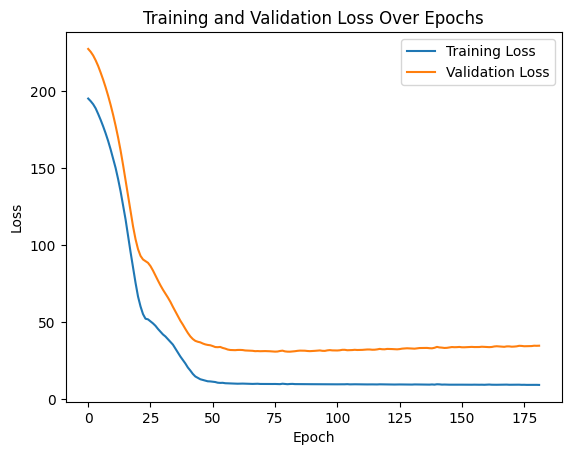

In [ ]:
 plot_loss(ann_1_layer_history)

In [ ]:
# Make predictions for 2023
ann_1_layer_y_pred = ann_1_layer_model.predict(X_test)

1/1 [==============================] - 0s 98ms/step


In [ ]:
# Evaluate the model
ann_1_layer_mse, ann_1_layer_r2, ann_1_layer_mape =ann_1_layer_model.evaluate(X_test, y_test)[1:4]
print(f"Mean Squared Error: {ann_1_layer_mse}")
print(f'R-squared score: {ann_1_layer_r2}')
print(f'Mean absolute percentage error: {ann_1_layer_mape}')

1/1 [==============================] - 0s 331ms/step - loss: 34.8454 - mean_squared_error: 34.8454 - r2_score: 0.5777 - mean_absolute_percentage_error: 33.5058
Mean Squared Error: 34.845428466796875
R-squared score: 0.5776599049568176
Mean absolute percentage error: 33.50575637817383


In [ ]:
compare_random_samples(y_test, ann_1_layer_y_pred)

Actual: 17.9, Predicted: [15.061471]
Actual: 11.0, Predicted: [15.513601]
Actual: 9.7, Predicted: [11.839011]
Actual: 10.0, Predicted: [7.1605334]
Actual: 4.3, Predicted: [4.8216376]
Actual: 3.6, Predicted: [5.096589]
Actual: 17.8, Predicted: [19.516867]
Actual: 13.7, Predicted: [20.188902]
Actual: 8.7, Predicted: [7.8121686]
Actual: 8.9, Predicted: [10.463707]


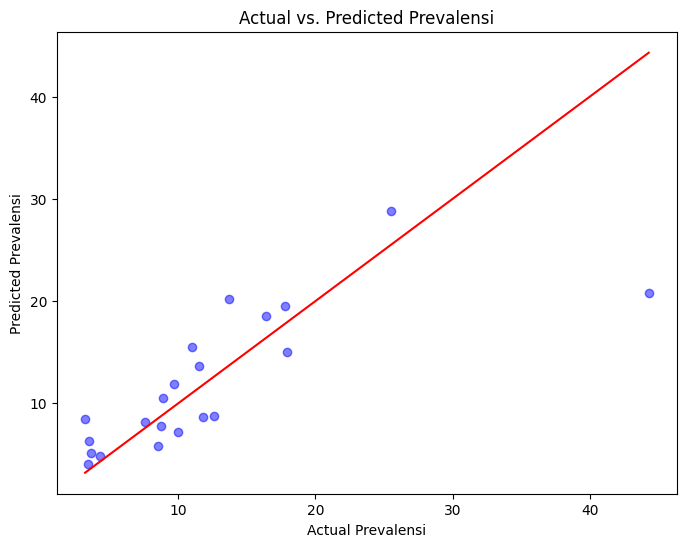

In [ ]:
plot_actual_vs_predicted(y_test, ann_1_layer_y_pred)

In [ ]:
ann_1_layer_y_pred_X= ann_1_layer_model.predict(X_2023_scaled)

4/4 [==============================] - 0s 3ms/step


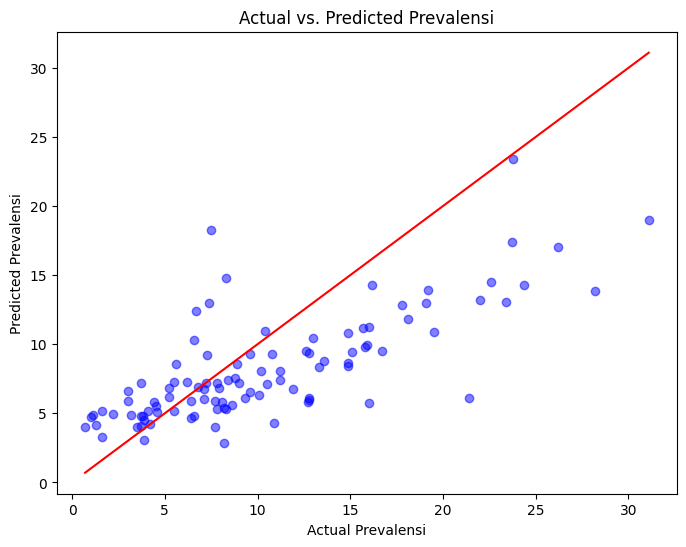

In [ ]:
plot_actual_vs_predicted(y_2023, ann_1_layer_y_pred_X)

In [ ]:
ann_1_layer_mse_X, ann_1_layer_r2_X, ann_1_layer_mape_X =ann_1_layer_model.evaluate(X_2023_scaled, y_2023)[1:4]
print(f"Mean Squared Error: {ann_1_layer_mse_X}")
print(f'R-squared score: {ann_1_layer_r2_X}')
print(f'Mean absolute percentage error: {ann_1_layer_mape_X}')

4/4 [==============================] - 0s 6ms/step - loss: 24.7962 - mean_squared_error: 24.7962 - r2_score: 0.4342 - mean_absolute_percentage_error: 50.7735
Mean Squared Error: 24.796154022216797
R-squared score: 0.4341857433319092
Mean absolute percentage error: 50.77350616455078


#### 2 Layers Model

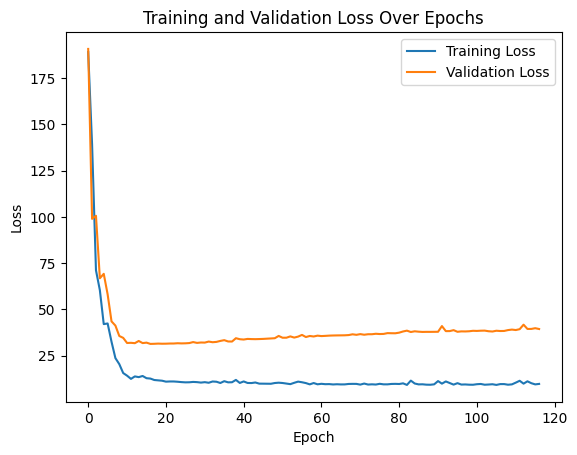

In [ ]:
plot_loss(ann_2_layer_history)

In [ ]:
# Make predictions for 2023
ann_2_layer_y_pred = ann_2_layer_model.predict(X_test)

1/1 [==============================] - 0s 67ms/step


In [ ]:
ann_2_layer_mse, ann_2_layer_r2, ann_2_layer_mape =ann_2_layer_model.evaluate(X_test, y_test)[1:4]
print(f"Mean Squared Error: {ann_2_layer_mse}")
print(f'R-squared score: {ann_2_layer_r2}')
print(f'Mean absolute percentage error: {ann_2_layer_mape}')


1/1 [==============================] - 0s 345ms/step - loss: 38.4395 - mean_squared_error: 38.4395 - r2_score: 0.5341 - mean_absolute_percentage_error: 42.8312
Mean Squared Error: 38.43951416015625
R-squared score: 0.534098207950592
Mean absolute percentage error: 42.831153869628906


In [ ]:
compare_random_samples(y_test, ann_2_layer_y_pred)

Actual: 11.8, Predicted: [8.303135]
Actual: 10.0, Predicted: [7.9475474]
Actual: 11.5, Predicted: [14.234039]
Actual: 3.2, Predicted: [9.380524]
Actual: 12.6, Predicted: [9.132416]
Actual: 13.7, Predicted: [21.719152]
Actual: 44.3, Predicted: [22.536997]
Actual: 3.6, Predicted: [5.190261]
Actual: 3.5, Predicted: [7.6973443]
Actual: 17.8, Predicted: [20.704855]


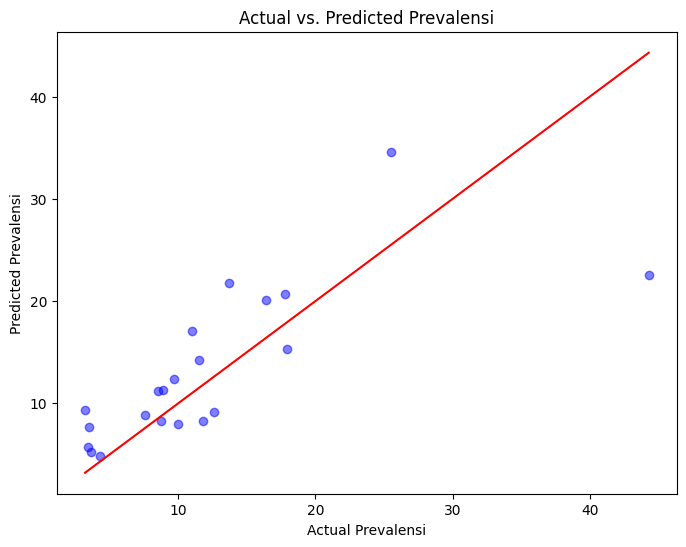

In [ ]:
plot_actual_vs_predicted(y_test, ann_2_layer_y_pred)

In [ ]:
ann_2_layer_y_pred_X= ann_2_layer_model.predict(X_2023_scaled)

4/4 [==============================] - 0s 3ms/step


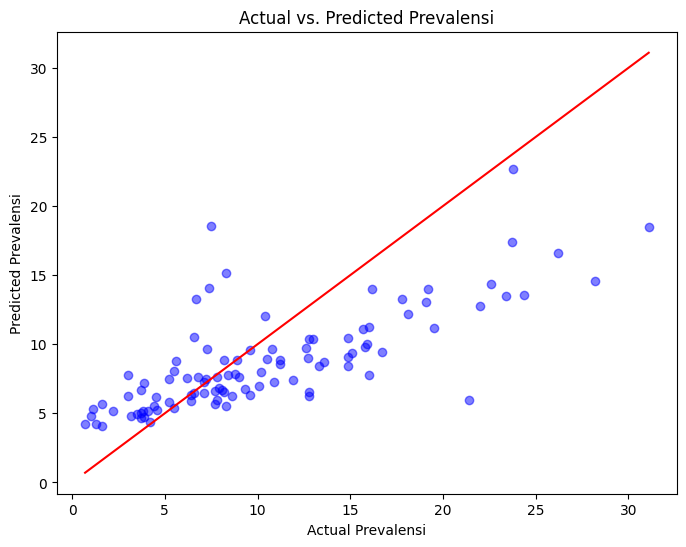

In [ ]:
plot_actual_vs_predicted(y_2023, ann_2_layer_y_pred_X)

In [ ]:
ann_2_layer_mse_X, ann_2_layer_r2_X,ann_2_layer_mape_X=ann_2_layer_model.evaluate(X_2023_scaled, y_2023)[1:4]
print(f"Mean Squared Error: {ann_2_layer_mse_X}")
print(f'R-squared score: {ann_2_layer_r2_X}')
print(f'Mean absolute percentage error: {ann_2_layer_mape_X}')


4/4 [==============================] - 0s 4ms/step - loss: 23.5496 - mean_squared_error: 23.5496 - r2_score: 0.4626 - mean_absolute_percentage_error: 51.6851
Mean Squared Error: 23.549623489379883
R-squared score: 0.46262985467910767
Mean absolute percentage error: 51.68511962890625


## Gradiaent Boosting Model

In [ ]:
def xgb_objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': 'gbtree',
        'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
        'learning_rate': trial.suggest_float('learning_rate', lr_range[0],lr_range[1], step = lr_range[0]),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, step=0.01),
        'gamma': trial.suggest_float('gamma', 0, 10,step=0.01),
        # 'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    print(f"Running Trial {trial.number}")

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=model_patience, verbose=False)


    # Evaluate the model on the validation set
    preds = model.predict(X_test)
    loss = mean_squared_error(y_test, preds)

    return loss

In [ ]:
xgb_study = optuna.create_study(direction='minimize')

start_time = time.time()

xgb_study.optimize(xgb_objective, n_trials=model_n_trial)

[I 2024-01-06 09:54:39,788] A new study created in memory with name: no-name-e8033f8d-d2ac-424f-945a-a69383cb201c
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:39,925] Trial 0 finished with value: 38.79921515594286 and parameters: {'n_estimators': 300, 'learning_rate': 0.07771, 'max_depth': 3, 'subsample': 0.9299999999999999, 'gamma': 0.07, 'min_child_weight': 8}. Best is trial 0 with value: 38.79921515594286.


Running Trial 0
Running Trial 1


<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:40,002] Trial 1 finished with value: 37.95156204143388 and parameters: {'n_estimators': 150, 'learning_rate': 0.03393000000000001, 'max_depth': 4, 'subsample': 0.8500000000000001, 'gamma': 2.68, 'min_child_weight': 6}. Best is trial 1 with value: 37.95156204143388.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/lo

Running Trial 2
Running Trial 3
Running Trial 4


[I 2024-01-06 09:54:40,273] Trial 4 finished with value: 23.44702987634641 and parameters: {'n_estimators': 150, 'learning_rate': 0.08284, 'max_depth': 3, 'subsample': 0.52, 'gamma': 0.1, 'min_child_weight': 2}. Best is trial 4 with value: 23.44702987634641.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:40,387] Trial 5 finished with value: 27.22709262945472 and parameters: {'n_estimators': 250, 'learning_rate': 0.022590000000000002, 'max_depth': 6, 'subsample': 0.74, 'gamma': 0.8300000000000001, 'min_child_weight': 4}. Best is trial 4 wi

Running Trial 5
Running Trial 6
Running Trial 7


[I 2024-01-06 09:54:40,507] Trial 7 finished with value: 48.885629881095326 and parameters: {'n_estimators': 100, 'learning_rate': 0.00719, 'max_depth': 4, 'subsample': 0.66, 'gamma': 5.63, 'min_child_weight': 2}. Best is trial 4 with value: 23.44702987634641.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:40,558] Trial 8 finished with value: 46.07824828012023 and parameters: {'n_estimators': 100, 'learning_rate': 0.01136, 'max_depth': 5, 'subsample': 0.87, 'gamma': 0.58, 'min_child_weight': 8}. Best is trial 4 with value: 23.447029876346

Running Trial 8
Running Trial 9
Running Trial 10


[I 2024-01-06 09:54:40,737] Trial 10 finished with value: 21.88203117309978 and parameters: {'n_estimators': 50, 'learning_rate': 0.09882, 'max_depth': 8, 'subsample': 0.5, 'gamma': 7.38, 'min_child_weight': 1}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:40,825] Trial 11 finished with value: 24.007170863690703 and parameters: {'n_estimators': 50, 'learning_rate': 0.09822, 'max_depth': 8, 'subsample': 0.51, 'gamma': 8.4, 'min_child_weight': 1}. Best is trial 10 with value: 21.882031173099

Running Trial 11
Running Trial 12
Running Trial 13


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:41,045] Trial 13 finished with value: 25.202287906055723 and parameters: {'n_estimators': 200, 'learning_rate': 0.07864, 'max_depth': 10, 'subsample': 0.58, 'gamma': 6.25, 'min_child_weight': 1}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.

Running Trial 14
Running Trial 15


<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:41,423] Trial 16 finished with value: 26.245669643246067 and parameters: {'n_estimators': 250, 'learning_rate': 0.08931, 'max_depth': 10, 'subsample': 0.66, 'gamma': 2.37, 'min_child_weight': 4}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dis

Running Trial 16
Running Trial 17


<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:41,651] Trial 18 finished with value: 22.843250643934383 and parameters: {'n_estimators': 200, 'learning_rate': 0.0913, 'max_depth': 6, 'subsample': 0.63, 'gamma': 4.95, 'min_child_weight': 2}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-

Running Trial 18
Running Trial 19


[I 2024-01-06 09:54:41,800] Trial 19 finished with value: 31.163856966273165 and parameters: {'n_estimators': 250, 'learning_rate': 0.03747, 'max_depth': 6, 'subsample': 0.63, 'gamma': 5.1000000000000005, 'min_child_weight': 5}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:41,917] Trial 20 finished with value: 34.91208182956582 and parameters: {'n_estimators': 200, 'learning_rate': 0.09156, 'max_depth': 9, 'subsample': 0.7, 'gamma': 6.6000000000000005, 'min_child_weight': 10}. Best is tria

Running Trial 20
Running Trial 21


<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:42,181] Trial 22 finished with value: 22.723673506215754 and parameters: {'n_estimators': 200, 'learning_rate': 0.06903000000000001, 'max_depth': 7, 'subsample': 0.54, 'gamma': 3.85, 'min_child_weight': 2}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),


Running Trial 22
Running Trial 23


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:42,349] Trial 23 finished with value: 22.567240674273208 and parameters: {'n_estimators': 200, 'learning_rate': 0.06876, 'max_depth': 7, 'subsample': 0.55, 'gamma': 3.66, 'min_child_weight': 1}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.w

Running Trial 24
Running Trial 25


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:42,648] Trial 25 finished with value: 26.778188046835858 and parameters: {'n_estimators': 200, 'learning_rate': 0.059910000000000005, 'max_depth': 7, 'subsample': 0.53, 'gamma': 1.6400000000000001, 'min_child_weight': 4}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_pa

Running Trial 26
Running Trial 27


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:42,954] Trial 27 finished with value: 22.555882228798797 and parameters: {'n_estimators': 200, 'learning_rate': 0.07317, 'max_depth': 7, 'subsample': 0.61, 'gamma': 3.48, 'min_child_weight': 3}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.w

Running Trial 28
Running Trial 29


<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:43,334] Trial 30 finished with value: 24.594080765096134 and parameters: {'n_estimators': 150, 'learning_rate': 0.07386000000000001, 'max_depth': 9, 'subsample': 0.77, 'gamma': 1.58, 'min_child_weight': 3}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),


Running Trial 30
Running Trial 31


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:43,468] Trial 31 finished with value: 25.44551182191304 and parameters: {'n_estimators': 200, 'learning_rate': 0.08519, 'max_depth': 7, 'subsample': 0.55, 'gamma': 3.35, 'min_child_weight': 2}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.wa

Running Trial 32
Running Trial 33


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:43,760] Trial 33 finished with value: 23.07666269406955 and parameters: {'n_estimators': 150, 'learning_rate': 0.07228, 'max_depth': 7, 'subsample': 0.53, 'gamma': 4.05, 'min_child_weight': 2}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.wa

Running Trial 34
Running Trial 35


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:44,091] Trial 35 finished with value: 23.847832708180686 and parameters: {'n_estimators': 200, 'learning_rate': 0.05246000000000001, 'max_depth': 6, 'subsample': 0.58, 'gamma': 4.8100000000000005, 'min_child_weight': 1}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_par

Running Trial 36


<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Running Trial 37


[I 2024-01-06 09:54:45,066] Trial 37 finished with value: 24.651956438796734 and parameters: {'n_estimators': 200, 'learning_rate': 0.048240000000000005, 'max_depth': 8, 'subsample': 0.65, 'gamma': 1.61, 'min_child_weight': 2}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),


Running Trial 38


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:45,519] Trial 38 finished with value: 24.346853222710575 and parameters: {'n_estimators': 100, 'learning_rate': 0.08269, 'max_depth': 6, 'subsample': 0.5, 'gamma': 5.68, 'min_child_weight': 2}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.wa

Running Trial 39


[I 2024-01-06 09:54:46,076] Trial 39 finished with value: 25.350306461888067 and parameters: {'n_estimators': 250, 'learning_rate': 0.02398, 'max_depth': 9, 'subsample': 0.8300000000000001, 'gamma': 8.77, 'min_child_weight': 3}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),


Running Trial 40


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:46,532] Trial 40 finished with value: 29.83508294283981 and parameters: {'n_estimators': 150, 'learning_rate': 0.0954, 'max_depth': 5, 'subsample': 0.74, 'gamma': 4.61, 'min_child_weight': 1}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.war

Running Trial 41


[I 2024-01-06 09:54:46,966] Trial 41 finished with value: 22.911960348731753 and parameters: {'n_estimators': 300, 'learning_rate': 0.07099, 'max_depth': 8, 'subsample': 0.61, 'gamma': 7.69, 'min_child_weight': 3}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Running Trial 42


[I 2024-01-06 09:54:47,308] Trial 42 finished with value: 26.141773923464154 and parameters: {'n_estimators': 300, 'learning_rate': 0.05587000000000001, 'max_depth': 7, 'subsample': 0.59, 'gamma': 8.89, 'min_child_weight': 4}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:47,416] Trial 43 finished with value: 24.085901864342006 and parameters: {'n_estimators': 300, 'learning_rate': 0.08234, 'max_depth': 8, 'subsample': 0.63, 'gamma': 8.15, 'min_child_weight': 2}. Best is trial 10 with value

Running Trial 43
Running Trial 44


[I 2024-01-06 09:54:47,584] Trial 44 finished with value: 24.403811858828714 and parameters: {'n_estimators': 250, 'learning_rate': 0.06379, 'max_depth': 8, 'subsample': 0.53, 'gamma': 6.98, 'min_child_weight': 3}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:47,690] Trial 45 finished with value: 38.0067065373072 and parameters: {'n_estimators': 100, 'learning_rate': 0.07081, 'max_depth': 9, 'subsample': 0.98, 'gamma': 5.29, 'min_child_weight': 7}. Best is trial 10 with value: 21.882031173

Running Trial 45
Running Trial 46


<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:47,970] Trial 47 finished with value: 65.62013920137704 and parameters: {'n_estimators': 150, 'learning_rate': 0.00194, 'max_depth': 7, 'subsample': 0.91, 'gamma': 6.140000000000001, 'min_child_weight': 2}. Best is trial 10 with value: 21.88203117309978.
<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/pyt

Running Trial 47
Running Trial 48


<ipython-input-82-fdff6359514f>:6: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'n_estimators': trial.suggest_int('n_estimators', 50, 300, 50),
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
[I 2024-01-06 09:54:48,197] Trial 49 finished with value: 25.75318940540186 and parameters: {'n_estimators': 100, 'learning_rate': 0.056900000000000006, 'max_depth': 5, 'subsample': 0.72, 'gamma': 7.55, 'min_child_weight': 3}. Best is trial 10 with value: 21.88203117309978.


Running Trial 49


In [ ]:
end_time = time.time()
xgb_hyperparameter_tuning = end_time - start_time

In [ ]:
print('Number of finished trials: ', len(xgb_study.trials))
best_trial = xgb_study.best_trial

Number of finished trials:  50


In [ ]:
print('Value: ', best_trial.value)
print('Params: ')
for key, value in best_trial.params.items():
    print(f'    {key}: {value}')

Value:  21.88203117309978
Params: 
    n_estimators: 50
    learning_rate: 0.09882
    max_depth: 8
    subsample: 0.5
    gamma: 7.38
    min_child_weight: 1


In [ ]:
xgb_best_params =xgb_study.best_params
xgb_best_params

{'n_estimators': 50,
 'learning_rate': 0.09882,
 'max_depth': 8,
 'subsample': 0.5,
 'gamma': 7.38,
 'min_child_weight': 1}

In [ ]:
best_params = best_trial.params

In [ ]:
xgb_model = XGBRegressor(**best_params)

In [ ]:
start_time = time.time()

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=7.38, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09882, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
end_time = time.time()
xgb_training_time = end_time - start_time

In [ ]:
xgb_y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluate the model using Mean Squared Error (MSE)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
print(f"Mean Squared Error: {xgb_mse}")

Mean Squared Error: 21.88203117309978


In [ ]:
xgb_r2 = r2_score(y_test, xgb_y_pred)
print(f'R-squared score: {xgb_r2}')

R-squared score: 0.7347813370424554


In [ ]:
xgb_mape = mean_absolute_percentage_error(y_test, xgb_y_pred)*100
print(f'Mean absolute percentage error: {xgb_mape}')

Mean absolute percentage error: 32.209714226011286


In [ ]:
num_samples_to_compare = 10  # Choose the number of samples to compare
indices = np.random.choice(len(y_test), num_samples_to_compare, replace=False)

for idx in indices:
    print(f"Actual: {y_test.iloc[idx]}, Predicted: {xgb_y_pred[idx]}")

Actual: 7.6, Predicted: 5.807321071624756
Actual: 16.4, Predicted: 20.288742065429688
Actual: 11.5, Predicted: 13.074217796325684
Actual: 11.0, Predicted: 11.19040584564209
Actual: 9.7, Predicted: 9.306389808654785
Actual: 12.6, Predicted: 12.080606460571289
Actual: 44.3, Predicted: 28.432214736938477
Actual: 13.7, Predicted: 21.038719177246094
Actual: 8.9, Predicted: 8.652073860168457
Actual: 8.7, Predicted: 6.520732402801514


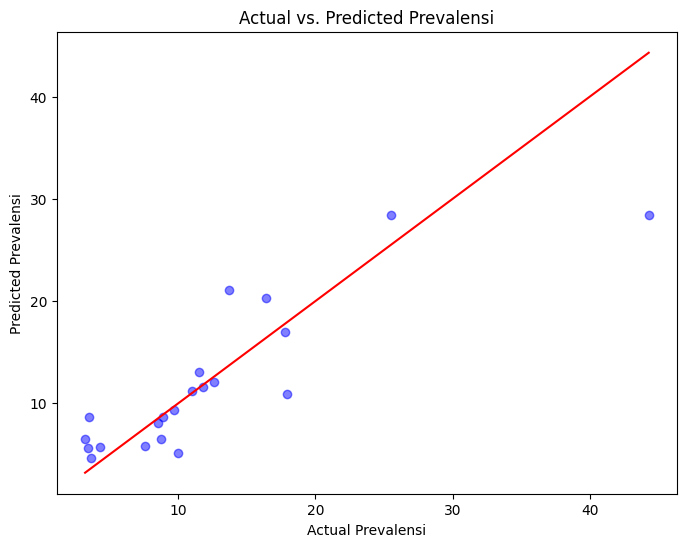

In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_y_pred, alpha=0.5, color='blue')  # Actual vs. Predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Prevalensi')
plt.xlabel('Actual Prevalensi')
plt.ylabel('Predicted Prevalensi')
plt.show()

In [ ]:
xgb_y_pred_X= xgb_model.predict(X_2023_scaled)

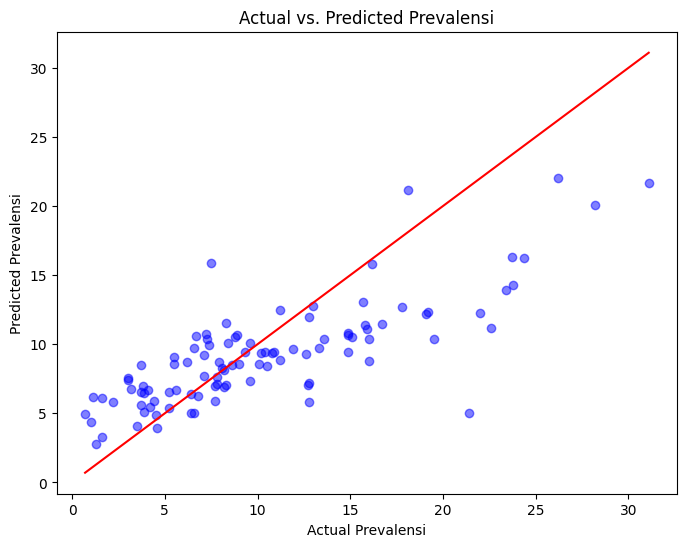

In [ ]:
# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_2023, xgb_y_pred_X, alpha=0.5, color='blue')  # Actual vs. Predicted
plt.plot([min(y_2023), max(y_2023)], [min(y_2023), max(y_2023)], color='red')  # Diagonal line for reference
plt.title('Actual vs. Predicted Prevalensi')
plt.xlabel('Actual Prevalensi')
plt.ylabel('Predicted Prevalensi')
plt.show()

In [ ]:
# num_samples_to_compare = 10  # Choose the number of samples to compare
# indices = np.random.choice(len(y_2023), num_samples_to_compare, replace=False)

# for idx in indices:
#     print(f"Actual: {y_2023.iloc[idx]}, Predicted: {xgb_y_pred_X[idx]}")
compare_random_samples(y_2023,xgb_y_pred_X)

Actual: 0.7, Predicted: 4.937610626220703
Actual: 14.9, Predicted: 10.78258991241455
Actual: 9.6, Predicted: 10.092986106872559
Actual: 4.6, Predicted: 3.9065985679626465
Actual: 5.5, Predicted: 8.58250617980957
Actual: 26.2, Predicted: 22.061017990112305
Actual: 22.0, Predicted: 12.279093742370605
Actual: 11.9, Predicted: 9.663246154785156
Actual: 1.0, Predicted: 4.364809513092041
Actual: 4.5, Predicted: 4.901596546173096


In [ ]:
# Evaluate the model using Mean Squared Error (MSE)
xgb_mse_X = mean_squared_error(y_2023, xgb_y_pred_X)
print(f"Mean Squared Error: {xgb_mse_X}")

Mean Squared Error: 19.87051012787255


In [ ]:
xgb_r2_X = r2_score(y_2023, xgb_y_pred_X)
print(f'R-squared score: {xgb_r2_X}')

R-squared score: 0.5465821852860484


In [ ]:
xgb_mape_X = mean_absolute_percentage_error(y_2023, xgb_y_pred_X)*100
print(f'Mean absolute percentage error: {xgb_mape_X}')

Mean absolute percentage error: 51.241802063872164


In [ ]:
print(f"ANN 1 layer Mean Squared Error: {ann_1_layer_mse_X}")
print(f'ANN 1 layer R-squared score: {ann_1_layer_r2_X}')
print(f"ANN 2 layer Mean Squared Error: {ann_2_layer_mse_X}")
print(f'ANN 2 layer R-squared score: {ann_2_layer_r2_X}')
print(f"XGB Mean Squared Error: {xgb_mse_X}")
print(f'XGB R-squared score: {xgb_r2_X}')

ANN 1 layer Mean Squared Error: 24.796154022216797
ANN 1 layer R-squared score: 0.4341857433319092
ANN 2 layer Mean Squared Error: 23.549623489379883
ANN 2 layer R-squared score: 0.46262985467910767
XGB Mean Squared Error: 19.87051012787255
XGB R-squared score: 0.5465821852860484


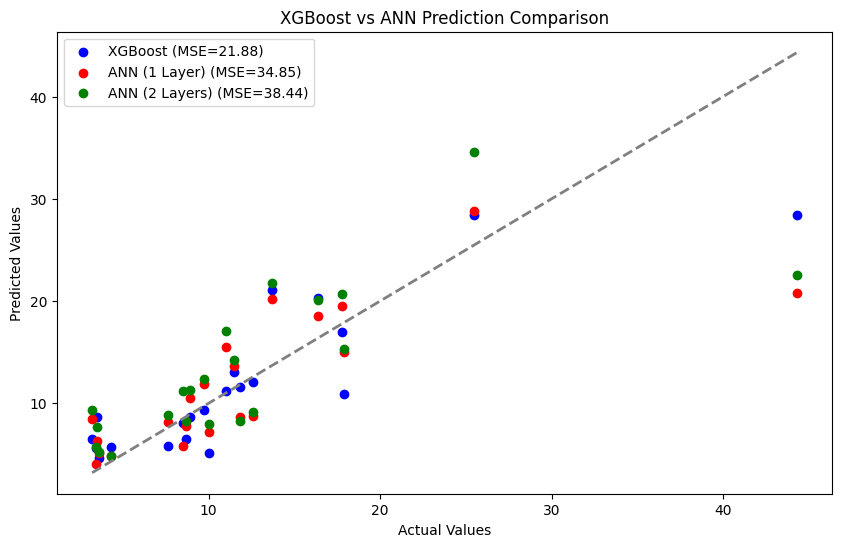

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, xgb_y_pred, color='blue', label=f'XGBoost (MSE={xgb_mse:.2f})')
plt.scatter(y_test, ann_1_layer_y_pred, color='red', label=f'ANN (1 Layer) (MSE={ann_1_layer_mse:.2f})')
plt.scatter(y_test, ann_2_layer_y_pred, color='green', label=f'ANN (2 Layers) (MSE={ann_2_layer_mse:.2f})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.title('XGBoost vs ANN Prediction Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

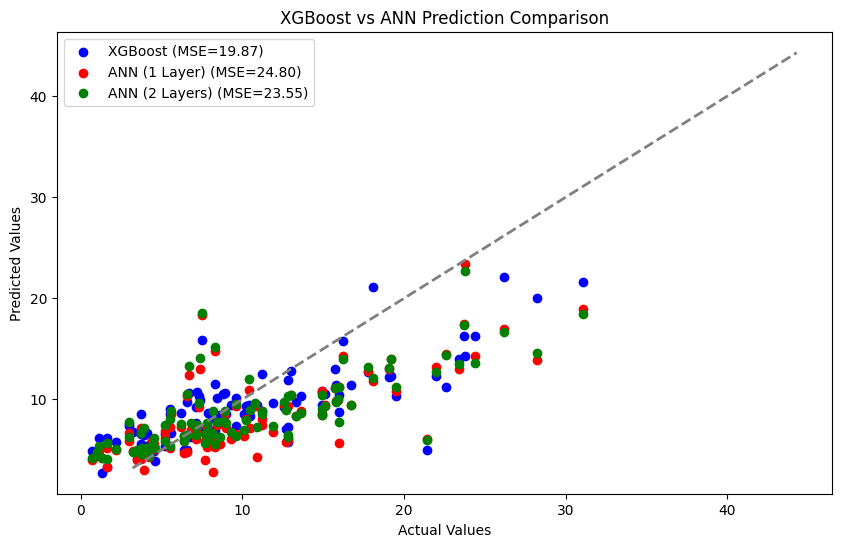

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(y_2023, xgb_y_pred_X, color='blue', label=f'XGBoost (MSE={xgb_mse_X:.2f})')
plt.scatter(y_2023, ann_1_layer_y_pred_X, color='red', label=f'ANN (1 Layer) (MSE={ann_1_layer_mse_X:.2f})')
plt.scatter(y_2023, ann_2_layer_y_pred_X, color='green', label=f'ANN (2 Layers) (MSE={ann_2_layer_mse_X:.2f})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.title('XGBoost vs ANN Prediction Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Linear Regression

In [ ]:
lr_model = LinearRegression()

In [ ]:
start_time = time.time()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
end_time = time.time()
lr_training_time = end_time - start_time

In [ ]:
lr_y_pred = lr_model.predict(X_test)

In [ ]:
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mape = mean_absolute_percentage_error(y_test, lr_y_pred)*100
print(f'Mean Squared Error: {lr_mse}')
print(f'R-squared: {lr_r2}')
print(f'Mean absolute percentage error: {lr_mape}')


Mean Squared Error: 43.67770274450028
R-squared: 0.470609385787085
Mean absolute percentage error: 34.661922590367276


In [ ]:
lr_y_pred_X = lr_model.predict(X_2023_scaled)

In [ ]:
lr_mse_X = mean_squared_error(y_2023, lr_y_pred_X)
lr_r2_X = r2_score(y_2023, lr_y_pred_X)
lr_mape_X = mean_absolute_percentage_error(y_2023, lr_y_pred_X)*100
print(f'Mean Squared Error: {lr_mse_X}')
print(f'R-squared: {lr_r2_X}')
print(f'Mean absolute percentage error: {lr_mape_X}')

Mean Squared Error: 21.90522747555729
R-squared: 0.5001527233642997
Mean absolute percentage error: 48.213433087471444


# Comparation

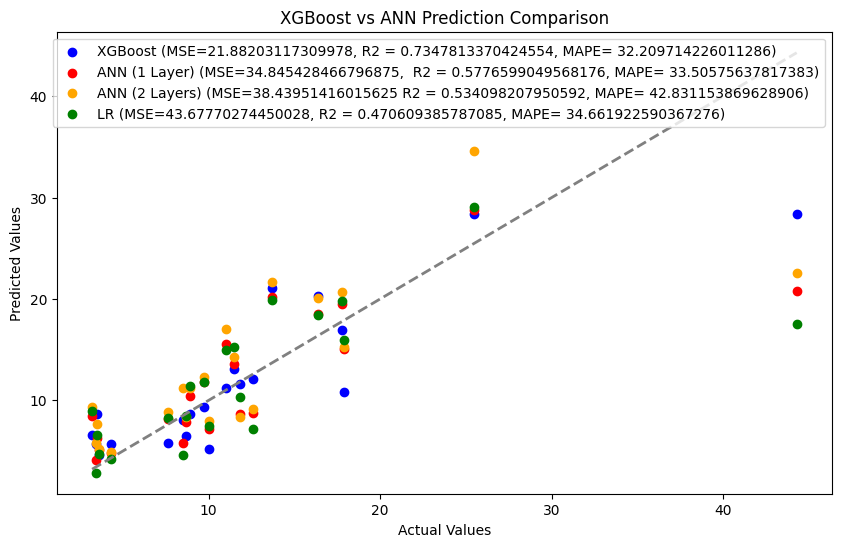

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(y_test, xgb_y_pred, color='blue', label=f'XGBoost (MSE={xgb_mse}, R2 = {xgb_r2}, MAPE= {xgb_mape})')
plt.scatter(y_test, ann_1_layer_y_pred, color='red', label=f'ANN (1 Layer) (MSE={ann_1_layer_mse},  R2 = {ann_1_layer_r2}, MAPE= {ann_1_layer_mape})')
plt.scatter(y_test, ann_2_layer_y_pred, color='orange', label=f'ANN (2 Layers) (MSE={ann_2_layer_mse} R2 = {ann_2_layer_r2}, MAPE= {ann_2_layer_mape})')
plt.scatter(y_test, lr_y_pred, color='green', label=f'LR (MSE={lr_mse}, R2 = {lr_r2}, MAPE= {lr_mape})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.title('XGBoost vs ANN Prediction Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

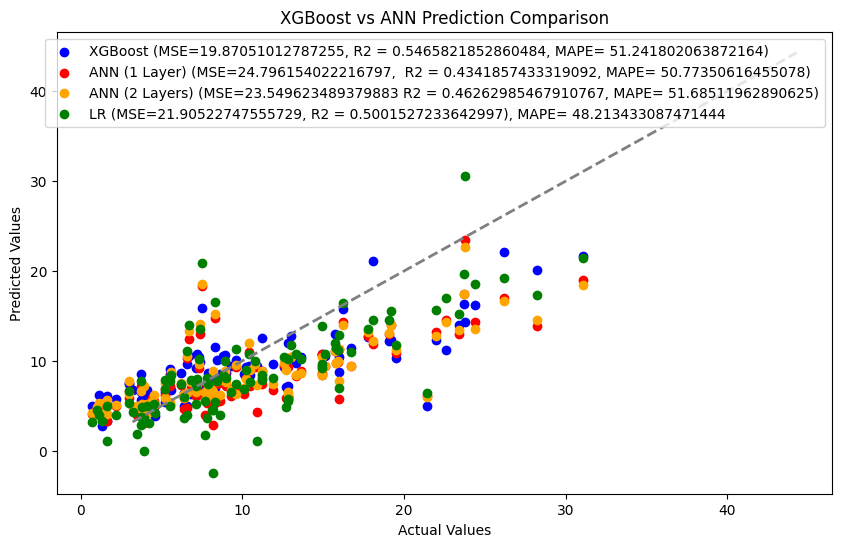

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(y_2023, xgb_y_pred_X, color='blue', label=f'XGBoost (MSE={xgb_mse_X}, R2 = {xgb_r2_X}, MAPE= {xgb_mape_X})')
plt.scatter(y_2023, ann_1_layer_y_pred_X, color='red', label=f'ANN (1 Layer) (MSE={ann_1_layer_mse_X},  R2 = {ann_1_layer_r2_X}, MAPE= {ann_1_layer_mape_X})')
plt.scatter(y_2023, ann_2_layer_y_pred_X, color='orange', label=f'ANN (2 Layers) (MSE={ann_2_layer_mse_X} R2 = {ann_2_layer_r2_X}, MAPE= {ann_2_layer_mape_X})')
plt.scatter(y_2023, lr_y_pred_X, color='green', label=f'LR (MSE={lr_mse_X}, R2 = {lr_r2_X}), MAPE= {lr_mape_X}')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2)

plt.title('XGBoost vs ANN Prediction Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
print("Training Performance")
print(f'XGBoost (MSE={xgb_mse}, R2 = {xgb_r2}, MAPE= {xgb_mape})')
print(f'ANN (1 Layer) (MSE={ann_1_layer_mse},  R2 = {ann_1_layer_r2}, MAPE= {ann_1_layer_mape})')
print(f'ANN (2 Layers) (MSE={ann_2_layer_mse} R2 = {ann_2_layer_r2}, MAPE= {ann_2_layer_mape})')
print(f'LR (MSE={lr_mse_X}, R2 = {lr_r2}), MAPE= {lr_mape}')

Training Performance
XGBoost (MSE=21.88203117309978, R2 = 0.7347813370424554, MAPE= 32.209714226011286)
ANN (1 Layer) (MSE=34.845428466796875,  R2 = 0.5776599049568176, MAPE= 33.50575637817383)
ANN (2 Layers) (MSE=38.43951416015625 R2 = 0.534098207950592, MAPE= 42.831153869628906)
LR (MSE=21.90522747555729, R2 = 0.470609385787085), MAPE= 34.661922590367276


In [ ]:
# print(f'XGBoost (MSE={xgb_mse_X:.2f}, R2 = {xgb_r2_X}, MAPE= {xgb_mape_X})')
# print(f'ANN (1 Layer) (MSE={ann_1_layer_mse_X:.2f},  R2 = {ann_1_layer_r2_X}, MAPE= {ann_1_layer_mape_X})')
# print(f'ANN (2 Layers) (MSE={ann_2_layer_mse_X:.2f} R2 = {ann_2_layer_r2_X}, MAPE= {ann_2_layer_mape_X})')
# print(f'LR (MSE={lr_mse_X:.2f}, R2 = {lr_r2_X}), MAPE= {lr_mape_X}')
print("Testing Performance")
print(f'XGBoost (MSE={xgb_mse_X}, R2 = {xgb_r2_X}, MAPE= {xgb_mape_X})')
print(f'ANN (1 Layer) (MSE={ann_1_layer_mse_X},  R2 = {ann_1_layer_r2_X}, MAPE= {ann_1_layer_mape_X})')
print(f'ANN (2 Layers) (MSE={ann_2_layer_mse_X} R2 = {ann_2_layer_r2_X}, MAPE= {ann_2_layer_mape_X})')
print(f'LR (MSE={lr_mse_X}, R2 = {lr_r2_X}), MAPE= {lr_mape_X}')

Testing Performance
XGBoost (MSE=19.87051012787255, R2 = 0.5465821852860484, MAPE= 51.241802063872164)
ANN (1 Layer) (MSE=24.796154022216797,  R2 = 0.4341857433319092, MAPE= 50.77350616455078)
ANN (2 Layers) (MSE=23.549623489379883 R2 = 0.46262985467910767, MAPE= 51.68511962890625)
LR (MSE=21.90522747555729, R2 = 0.5001527233642997), MAPE= 48.213433087471444


In [ ]:
# Creating a dictionary
training_performance = {
    'Model': ['XGBoost', 'ANN (1 Layer)', 'ANN (2 Layers)', 'LR'],
    'MSE': [xgb_mse, ann_1_layer_mse, ann_2_layer_mse, lr_mse],
    'R2': [xgb_r2, ann_1_layer_r2, ann_2_layer_r2, lr_r2],
    'MAPE': [xgb_mape, ann_1_layer_mape, ann_2_layer_mape, lr_mape]
}

# Creating a DataFrame
train_performance_df = pd.DataFrame(training_performance)

# Printing the DataFrame
train_performance_df

,Model,MSE,R2,MAPE
0,XGBoost,21.882031,0.734781,32.209714
1,ANN (1 Layer),34.845428,0.577660,33.505756
2,ANN (2 Layers),38.439514,0.534098,42.831154
3,LR,43.677703,0.470609,34.661923


In [ ]:
# Creating a dictionary
testing_performance = {
    'Model': ['XGBoost', 'ANN (1 Layer)', 'ANN (2 Layers)', 'LR'],
    'MSE': [xgb_mse_X, ann_1_layer_mse_X, ann_2_layer_mse_X, lr_mse_X],
    'R2': [xgb_r2_X, ann_1_layer_r2_X, ann_2_layer_r2_X, lr_r2_X],
    'MAPE': [xgb_mape_X, ann_1_layer_mape_X, ann_2_layer_mape_X, lr_mape_X]
}

# Creating a DataFrame
test_performance_df = pd.DataFrame(testing_performance)

# Printing the DataFrame
test_performance_df

,Model,MSE,R2,MAPE
0,XGBoost,19.870510,0.546582,51.241802
1,ANN (1 Layer),24.796154,0.434186,50.773506
2,ANN (2 Layers),23.549623,0.462630,51.685120
3,LR,21.905227,0.500153,48.213433


In [ ]:
print("ann_1_layer:",ann_1_layer_best_params)
print("ann_2_layer:",ann_2_layer_best_params)
print("xgb:",xgb_best_params)

ann_1_layer: {'num_neurons_layer1': 6, 'learning_rate': 0.011930000000000001, 'batch_size': 32}
ann_2_layer: {'num_neurons_layer1': 8, 'num_neurons_layer2': 9, 'learning_rate': 0.06422, 'batch_size': 32}
xgb: {'n_estimators': 50, 'learning_rate': 0.09882, 'max_depth': 8, 'subsample': 0.5, 'gamma': 7.38, 'min_child_weight': 1}


In [ ]:
ann_1_layer_com_pred = compare_samples_in_range(y_2023, ann_1_layer_y_pred_X)

Actual: 7.8, Predicted: 7.182600021362305
Actual: 10.9, Predicted: 4.323041915893555
Actual: 4.5, Predicted: 5.54832649230957
Actual: 3.7, Predicted: 4.073664665222168
Actual: 3.2, Predicted: 4.870826721191406
Actual: 3.7, Predicted: 7.206791400909424
Actual: 9.0, Predicted: 7.180398941040039
Actual: 6.4, Predicted: 5.907630443572998
Actual: 8.8, Predicted: 7.558422088623047
Actual: 8.3, Predicted: 5.320321083068848


In [ ]:
ann_2_layer_com_pred = compare_samples_in_range(y_2023, ann_2_layer_y_pred_X)

Actual: 7.8, Predicted: 7.6545729637146
Actual: 10.9, Predicted: 7.288844585418701
Actual: 4.5, Predicted: 6.1647491455078125
Actual: 3.7, Predicted: 5.030760765075684
Actual: 3.2, Predicted: 4.832064151763916
Actual: 3.7, Predicted: 6.680551052093506
Actual: 9.0, Predicted: 7.6443705558776855
Actual: 6.4, Predicted: 5.906635284423828
Actual: 8.8, Predicted: 7.878446102142334
Actual: 8.3, Predicted: 5.550055027008057


In [ ]:
xgb_com_pred = compare_samples_in_range(y_2023, xgb_y_pred_X)

Actual: 7.8, Predicted: 7.113691806793213
Actual: 10.9, Predicted: 9.421127319335938
Actual: 4.5, Predicted: 4.901596546173096
Actual: 3.7, Predicted: 6.531628131866455
Actual: 3.2, Predicted: 6.794374942779541
Actual: 3.7, Predicted: 8.52387523651123
Actual: 9.0, Predicted: 8.601445198059082
Actual: 6.4, Predicted: 5.01258659362793
Actual: 8.8, Predicted: 10.505855560302734
Actual: 8.3, Predicted: 7.014770984649658


In [ ]:
lr_com_pred=compare_samples_in_range(y_2023, lr_y_pred_X)

Actual: 7.8, Predicted: 8.05695033277008
Actual: 10.9, Predicted: 1.1250453945098613
Actual: 4.5, Predicted: 5.2428360026713765
Actual: 3.7, Predicted: 2.907372012904651
Actual: 3.2, Predicted: 4.35934928880655
Actual: 3.7, Predicted: 7.790473962728141
Actual: 9.0, Predicted: 8.130457301906961
Actual: 6.4, Predicted: 5.976110384507846
Actual: 8.8, Predicted: 8.4369016392229
Actual: 8.3, Predicted: 5.407450000939966


In [ ]:
def combine_predictions_multiple_models(dataframes, model_names):
    combined_df = dataframes[0][['Actual']].copy()

    for model_name, df in zip(model_names, dataframes):
        combined_df[f'Predicted_{model_name}'] = df['Predicted']

    return combined_df

In [ ]:
model_names = ['ANN1_layer', 'ANN2_layer', 'XGB', 'LR']

predictions_list = [ann_1_layer_com_pred, ann_2_layer_com_pred, xgb_com_pred, lr_com_pred]

result_df = combine_predictions_multiple_models(predictions_list, model_names)
result_df

,Actual,Predicted_ANN1_layer,Predicted_ANN2_layer,Predicted_XGB,Predicted_LR
0,7.8,7.182600,7.654573,7.113692,8.056950
1,10.9,4.323042,7.288845,9.421127,1.125045
2,4.5,5.548326,6.164749,4.901597,5.242836
3,3.7,4.073665,5.030761,6.531628,2.907372
4,3.2,4.870827,4.832064,6.794375,4.359349
5,3.7,7.206791,6.680551,8.523875,7.790474
6,9.0,7.180399,7.644371,8.601445,8.130457
7,6.4,5.907630,5.906635,5.012587,5.976110
8,8.8,7.558422,7.878446,10.505856,8.436902
9,8.3,5.320321,5.550055,7.014771,5.407450


In [ ]:
print("ANN 1 layer :",ann_1_layer_hyperparameter_tuning)
print("ANN 2 layer :",ann_2_layer_hyperparameter_tuning)
print("XGBoost :",xgb_hyperparameter_tuning)

ANN 1 layer : 806.5502364635468
ANN 2 layer : 509.6467270851135
XGBoost : 8.427319526672363


In [ ]:
print("ANN 1 layer :",ann_1_layer_training_time)
print("ANN 2 layer :",ann_2_layer_training_time)
print("XGBoost :",xgb_training_time)
print("lr :",lr_training_time)

ANN 1 layer : 17.191993951797485
ANN 2 layer : 11.153331279754639
XGBoost : 0.0658411979675293
lr : 0.05710554122924805
